In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline
import datetime

In [36]:
file_loc = r'C:\Users\nkuma\Downloads\EE 798Q\Interpolated Data'
air_pollution_data = pd.read_csv(file_loc, index_col=0,  header = 0)

In [37]:
air_pollution_data.head(1)

PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  NO2(µg/m3)  \
To                                                                      
2023-02-01 00:15:00         95.0          35.0       18.1        90.1   

                     NOX(ppb)  CO(mg/m3)  SO2(µg/m3)  NH3(µg/m3)  \
To                                                                 
2023-02-01 00:15:00      56.2       0.31         8.2        17.7   

                     Ozone(µg/m3)  Benzene(µg/m3)  
To                                                 
2023-02-01 00:15:00          28.1             0.4

In [38]:
df = pd.DataFrame(air_pollution_data)

In [39]:
#df.columns = ['From','To','PM10(µg/m3)','PM2.5(µg/m3)','NO(µg/m3)','NO2(µg/m3)','NOX(ppb)','CO(µg/m3)','SO2(µg/m3)','NH3(µg/m3)','Ozone(µg/m3)','Benzene(µg/m3)']

In [40]:
df.head(1)

PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  NO2(µg/m3)  \
To                                                                      
2023-02-01 00:15:00         95.0          35.0       18.1        90.1   

                     NOX(ppb)  CO(mg/m3)  SO2(µg/m3)  NH3(µg/m3)  \
To                                                                 
2023-02-01 00:15:00      56.2       0.31         8.2        17.7   

                     Ozone(µg/m3)  Benzene(µg/m3)  
To                                                 
2023-02-01 00:15:00          28.1             0.4

In [41]:
# df = df[:-3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8640 entries, 2023-02-01 00:15:00 to 2023-05-02 00:00:00
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PM10(µg/m3)     8640 non-null   float64
 1   PM2.5(µg/m3)    8640 non-null   float64
 2   NO(µg/m3)       8640 non-null   float64
 3   NO2(µg/m3)      8640 non-null   float64
 4   NOX(ppb)        8640 non-null   float64
 5   CO(mg/m3)       8640 non-null   float64
 6   SO2(µg/m3)      8640 non-null   float64
 7   NH3(µg/m3)      8640 non-null   float64
 8   Ozone(µg/m3)    8640 non-null   float64
 9   Benzene(µg/m3)  8232 non-null   float64
dtypes: float64(10)
memory usage: 742.5+ KB


In [42]:
df.index = pd.to_datetime(df.index,format='%Y-%m-%d %H:%M:%S')
df.index

DatetimeIndex(['2023-02-01 00:15:00', '2023-02-01 00:30:00',
               '2023-02-01 00:45:00', '2023-02-01 01:00:00',
               '2023-02-01 01:15:00', '2023-02-01 01:30:00',
               '2023-02-01 01:45:00', '2023-02-01 02:00:00',
               '2023-02-01 02:15:00', '2023-02-01 02:30:00',
               ...
               '2023-05-01 21:45:00', '2023-05-01 22:00:00',
               '2023-05-01 22:15:00', '2023-05-01 22:30:00',
               '2023-05-01 22:45:00', '2023-05-01 23:00:00',
               '2023-05-01 23:15:00', '2023-05-01 23:30:00',
               '2023-05-01 23:45:00', '2023-05-02 00:00:00'],
              dtype='datetime64[ns]', name='To', length=8640, freq=None)

In [43]:
df.head()

PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  NO2(µg/m3)  \
To                                                                      
2023-02-01 00:15:00         95.0          35.0       18.1        90.1   
2023-02-01 00:30:00         95.0          35.0       18.1        88.0   
2023-02-01 00:45:00         95.0          35.0       18.1        87.7   
2023-02-01 01:00:00        122.0          34.0       18.1        88.9   
2023-02-01 01:15:00        122.0          34.0       18.1        90.0   

                     NOX(ppb)  CO(mg/m3)  SO2(µg/m3)  NH3(µg/m3)  \
To                                                                 
2023-02-01 00:15:00      56.2       0.31         8.2        17.7   
2023-02-01 00:30:00      55.1       0.33         8.2        18.3   
2023-02-01 00:45:00      55.2       0.38         8.2        19.7   
2023-02-01 01:00:00      55.7       0.38         8.2        21.3   
2023-02-01 01:15:00      55.8       0.38         8.2        22.3   

                     Ozone(µg/m3)  Benzene(µg/m3)  
To                                                 
2023-02-01 00:15:00          28.1             0.4  
2023-02-01 00:30:00          27.1             0.4  
2023-02-01 00:45:00          24.9             0.4  
2023-02-01 01:00:00          21.9             0.4  
2023-02-01 01:15:00          16.7             0.4

In [44]:
start_date = '2023-02-01'
end_date = '2023-05-01'
freq = '15Min'
date_range = pd.date_range(start=start_date, end=end_date, freq=freq)
df = df.reindex(date_range)
max_per_day = df.groupby(df.index.date).max()
max_per_day

PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  NO2(µg/m3)    NOX(ppb)  \
2023-02-01        250.0     68.000000  18.100000   93.900000   59.500000   
2023-02-02        442.0    120.000000  18.100000   97.000000   84.700000   
2023-02-03        276.0    100.000000  18.100000  102.400000   75.000000   
2023-02-04        522.0    306.000000  18.100000   96.100000   74.900000   
2023-02-05        508.0    151.000000  18.100000   87.877988  100.200000   
...                 ...           ...        ...         ...         ...   
2023-04-27        246.0    114.000000  20.600000   95.000000   65.400000   
2023-04-28        323.0    117.000000  78.700000   98.800000  115.700000   
2023-04-29        409.0    129.000000  14.900000   98.800000   61.700000   
2023-04-30        210.0     95.000000  18.600000   99.100000   67.300000   
2023-05-01         92.0      9.330628  15.306241   96.641563   64.060722   

            CO(mg/m3)  SO2(µg/m3)  NH3(µg/m3)  Ozone(µg/m3)  Benzene(µg/m3)  
2023-02-01   1.225741         8.2   30.300000         59.80             0.4  
2023-02-02   2.260000         8.2   29.100000         55.80             0.2  
2023-02-03   1.960136         8.2   31.900000         61.70             0.2  
2023-02-04   2.340000         8.2   31.600000         66.00             0.3  
2023-02-05   2.380000         8.2   50.218117         64.50             0.3  
...               ...         ...         ...           ...             ...  
2023-04-27   1.520000       164.7   18.213843         74.10             0.3  
2023-04-28   2.470000        53.8   14.312913         74.50             0.1  
2023-04-29   1.710000        66.4   20.603935         68.50             0.1  
2023-04-30   1.224610        32.8   15.401601         46.00             0.1  
2023-05-01   0.676003         7.0   10.649005         31.15             0.2  

[90 rows x 10 columns]

In [45]:
max_per_day.columns

Index(['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(µg/m3)', 'NO2(µg/m3)', 'NOX(ppb)',
       'CO(mg/m3)', 'SO2(µg/m3)', 'NH3(µg/m3)', 'Ozone(µg/m3)',
       'Benzene(µg/m3)'],
      dtype='object')

For statistical inference of the time of blasting we do not require the quantitative analysis i.e., we do not need the density of the pollutants but the time at which the max of density occurred

In [46]:
df_max_time = max_per_day.copy()

for column in max_per_day.columns:
    daily_max = df[column].resample('D').max()
    max_time_per_day = df.resample('D')[column].idxmax().dt.time
    result = pd.DataFrame({'Max Value': daily_max, 'Time of Max': max_time_per_day})
    df_max_time[column] = result['Time of Max']
df_max_time


PM10(µg/m3) PM2.5(µg/m3) NO(µg/m3) NO2(µg/m3)  NOX(ppb) CO(mg/m3)  \
2023-02-01    21:00:00     08:00:00  00:15:00   21:30:00  22:15:00  10:15:00   
2023-02-02    20:00:00     20:00:00  00:00:00   20:15:00  22:30:00  19:15:00   
2023-02-03    21:00:00     08:00:00  00:00:00   21:15:00  00:00:00  10:15:00   
2023-02-04    09:00:00     08:00:00  00:00:00   21:30:00  21:45:00  07:30:00   
2023-02-05    23:00:00     07:00:00  00:00:00   15:45:00  23:45:00  21:00:00   
...                ...          ...       ...        ...       ...       ...   
2023-04-27    00:00:00     20:00:00  23:45:00   23:00:00  23:00:00  23:30:00   
2023-04-28    07:00:00     06:00:00  07:00:00   06:30:00  06:45:00  01:15:00   
2023-04-29    22:00:00     08:00:00  08:00:00   23:00:00  21:45:00  07:30:00   
2023-04-30    08:00:00     00:00:00  08:15:00   07:45:00  08:15:00  10:15:00   
2023-05-01    00:00:00     00:00:00  00:00:00   00:00:00  00:00:00  00:00:00   

           SO2(µg/m3) NH3(µg/m3) Ozone(µg/m3) Benzene(µg/m3)  
2023-02-01   00:15:00   17:30:00     13:15:00       00:15:00  
2023-02-02   00:00:00   11:45:00     16:00:00       19:30:00  
2023-02-03   00:00:00   10:45:00     13:45:00       00:00:00  
2023-02-04   00:00:00   11:15:00     16:15:00       07:15:00  
2023-02-05   00:00:00   16:15:00     11:30:00       00:45:00  
...               ...        ...          ...            ...  
2023-04-27   10:45:00   12:15:00     14:30:00       16:30:00  
2023-04-28   19:45:00   12:15:00     14:00:00       00:00:00  
2023-04-29   17:45:00   12:15:00     16:00:00       00:00:00  
2023-04-30   13:15:00   12:15:00     14:45:00       00:00:00  
2023-05-01   00:00:00   00:00:00     00:00:00       00:00:00  

[90 rows x 10 columns]

We can plot the graph of actual time of blasting v/s the time which we are getting from the data given to compare them.
As there can be some delay between the time of blasting and the time when the sensors start to sense the pollutants released due to it.

In [47]:
df_max_time['range_s'] = np.full(len(df_max_time), '13:45:00')
df_max_time['range_e'] = np.full(len(df_max_time), '14:45:00')
df_max_time

PM10(µg/m3) PM2.5(µg/m3) NO(µg/m3) NO2(µg/m3)  NOX(ppb) CO(mg/m3)  \
2023-02-01    21:00:00     08:00:00  00:15:00   21:30:00  22:15:00  10:15:00   
2023-02-02    20:00:00     20:00:00  00:00:00   20:15:00  22:30:00  19:15:00   
2023-02-03    21:00:00     08:00:00  00:00:00   21:15:00  00:00:00  10:15:00   
2023-02-04    09:00:00     08:00:00  00:00:00   21:30:00  21:45:00  07:30:00   
2023-02-05    23:00:00     07:00:00  00:00:00   15:45:00  23:45:00  21:00:00   
...                ...          ...       ...        ...       ...       ...   
2023-04-27    00:00:00     20:00:00  23:45:00   23:00:00  23:00:00  23:30:00   
2023-04-28    07:00:00     06:00:00  07:00:00   06:30:00  06:45:00  01:15:00   
2023-04-29    22:00:00     08:00:00  08:00:00   23:00:00  21:45:00  07:30:00   
2023-04-30    08:00:00     00:00:00  08:15:00   07:45:00  08:15:00  10:15:00   
2023-05-01    00:00:00     00:00:00  00:00:00   00:00:00  00:00:00  00:00:00   

           SO2(µg/m3) NH3(µg/m3) Ozone(µg/m3) Benzene(µg/m3)   range_s  \
2023-02-01   00:15:00   17:30:00     13:15:00       00:15:00  13:45:00   
2023-02-02   00:00:00   11:45:00     16:00:00       19:30:00  13:45:00   
2023-02-03   00:00:00   10:45:00     13:45:00       00:00:00  13:45:00   
2023-02-04   00:00:00   11:15:00     16:15:00       07:15:00  13:45:00   
2023-02-05   00:00:00   16:15:00     11:30:00       00:45:00  13:45:00   
...               ...        ...          ...            ...       ...   
2023-04-27   10:45:00   12:15:00     14:30:00       16:30:00  13:45:00   
2023-04-28   19:45:00   12:15:00     14:00:00       00:00:00  13:45:00   
2023-04-29   17:45:00   12:15:00     16:00:00       00:00:00  13:45:00   
2023-04-30   13:15:00   12:15:00     14:45:00       00:00:00  13:45:00   
2023-05-01   00:00:00   00:00:00     00:00:00       00:00:00  13:45:00   

             range_e  
2023-02-01  14:45:00  
2023-02-02  14:45:00  
2023-02-03  14:45:00  
2023-02-04  14:45:00  
2023-02-05  14:45:00  
...              ...  
2023-04-27  14:45:00  
2023-04-28  14:45:00  
2023-04-29  14:45:00  
2023-04-30  14:45:00  
2023-05-01  14:45:00  

[90 rows x 12 columns]

In [48]:
for column in df_max_time.columns:
    df_max_time[column] = pd.to_datetime(df_max_time[column], format = '%H:%M:%S')

df_max_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 2023-02-01 to 2023-05-01
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PM10(µg/m3)     90 non-null     datetime64[ns]
 1   PM2.5(µg/m3)    90 non-null     datetime64[ns]
 2   NO(µg/m3)       90 non-null     datetime64[ns]
 3   NO2(µg/m3)      90 non-null     datetime64[ns]
 4   NOX(ppb)        90 non-null     datetime64[ns]
 5   CO(mg/m3)       90 non-null     datetime64[ns]
 6   SO2(µg/m3)      90 non-null     datetime64[ns]
 7   NH3(µg/m3)      90 non-null     datetime64[ns]
 8   Ozone(µg/m3)    90 non-null     datetime64[ns]
 9   Benzene(µg/m3)  90 non-null     datetime64[ns]
 10  range_s         90 non-null     datetime64[ns]
 11  range_e         90 non-null     datetime64[ns]
dtypes: datetime64[ns](12)
memory usage: 9.1+ KB


In [49]:
from datetime import datetime, timedelta

days = 0
for row in df_max_time.index:
    for column in df_max_time.columns:
        df_max_time[column][row] = df_max_time[column][row].replace(year=2023, month=2, day=1)
    days += 1

df_max_time.head()

PM10(µg/m3)        PM2.5(µg/m3)           NO(µg/m3)  \
2023-02-01 2023-02-01 21:00:00 2023-02-01 08:00:00 2023-02-01 00:15:00   
2023-02-02 2023-02-01 20:00:00 2023-02-01 20:00:00 2023-02-01 00:00:00   
2023-02-03 2023-02-01 21:00:00 2023-02-01 08:00:00 2023-02-01 00:00:00   
2023-02-04 2023-02-01 09:00:00 2023-02-01 08:00:00 2023-02-01 00:00:00   
2023-02-05 2023-02-01 23:00:00 2023-02-01 07:00:00 2023-02-01 00:00:00   

                    NO2(µg/m3)            NOX(ppb)           CO(mg/m3)  \
2023-02-01 2023-02-01 21:30:00 2023-02-01 22:15:00 2023-02-01 10:15:00   
2023-02-02 2023-02-01 20:15:00 2023-02-01 22:30:00 2023-02-01 19:15:00   
2023-02-03 2023-02-01 21:15:00 2023-02-01 00:00:00 2023-02-01 10:15:00   
2023-02-04 2023-02-01 21:30:00 2023-02-01 21:45:00 2023-02-01 07:30:00   
2023-02-05 2023-02-01 15:45:00 2023-02-01 23:45:00 2023-02-01 21:00:00   

                    SO2(µg/m3)          NH3(µg/m3)        Ozone(µg/m3)  \
2023-02-01 2023-02-01 00:15:00 2023-02-01 17:30:00 2023-02-01 13:15:00   
2023-02-02 2023-02-01 00:00:00 2023-02-01 11:45:00 2023-02-01 16:00:00   
2023-02-03 2023-02-01 00:00:00 2023-02-01 10:45:00 2023-02-01 13:45:00   
2023-02-04 2023-02-01 00:00:00 2023-02-01 11:15:00 2023-02-01 16:15:00   
2023-02-05 2023-02-01 00:00:00 2023-02-01 16:15:00 2023-02-01 11:30:00   

                Benzene(µg/m3)             range_s             range_e  
2023-02-01 2023-02-01 00:15:00 2023-02-01 13:45:00 2023-02-01 14:45:00  
2023-02-02 2023-02-01 19:30:00 2023-02-01 13:45:00 2023-02-01 14:45:00  
2023-02-03 2023-02-01 00:00:00 2023-02-01 13:45:00 2023-02-01 14:45:00  
2023-02-04 2023-02-01 07:15:00 2023-02-01 13:45:00 2023-02-01 14:45:00  
2023-02-05 2023-02-01 00:45:00 2023-02-01 13:45:00 2023-02-01 14:45:00

In [50]:
PM10 = df_max_time['PM10(µg/m3)']
PM25 = df_max_time['PM2.5(µg/m3)']
NO = df_max_time['NO(µg/m3)']
NO2 = df_max_time['NO2(µg/m3)']
NOX = df_max_time['NOX(ppb)']
CO = df_max_time['CO(mg/m3)']
SO2 = df_max_time['SO2(µg/m3)']
NH3 = df_max_time['NH3(µg/m3)']
OZONE = df_max_time['Ozone(µg/m3)']
BENZENE = df_max_time['Benzene(µg/m3)']

In [59]:
start_time = pd.to_datetime('2023-02-01 00:00:00')  # Start time: 00:00:00
end_time = pd.to_datetime('2023-02-02 00:00:00')  # End time: 23:00:00
interval = datetime.timedelta(hours=1)
datetime_array = []
current_time = start_time
while current_time <= end_time:
    datetime_array.append(current_time)
    current_time += interval
datetime_array


[Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-02-01 01:00:00'),
 Timestamp('2023-02-01 02:00:00'),
 Timestamp('2023-02-01 03:00:00'),
 Timestamp('2023-02-01 04:00:00'),
 Timestamp('2023-02-01 05:00:00'),
 Timestamp('2023-02-01 06:00:00'),
 Timestamp('2023-02-01 07:00:00'),
 Timestamp('2023-02-01 08:00:00'),
 Timestamp('2023-02-01 09:00:00'),
 Timestamp('2023-02-01 10:00:00'),
 Timestamp('2023-02-01 11:00:00'),
 Timestamp('2023-02-01 12:00:00'),
 Timestamp('2023-02-01 13:00:00'),
 Timestamp('2023-02-01 14:00:00'),
 Timestamp('2023-02-01 15:00:00'),
 Timestamp('2023-02-01 16:00:00'),
 Timestamp('2023-02-01 17:00:00'),
 Timestamp('2023-02-01 18:00:00'),
 Timestamp('2023-02-01 19:00:00'),
 Timestamp('2023-02-01 20:00:00'),
 Timestamp('2023-02-01 21:00:00'),
 Timestamp('2023-02-01 22:00:00'),
 Timestamp('2023-02-01 23:00:00'),
 Timestamp('2023-02-02 00:00:00')]

<IPython.core.display.Javascript object>


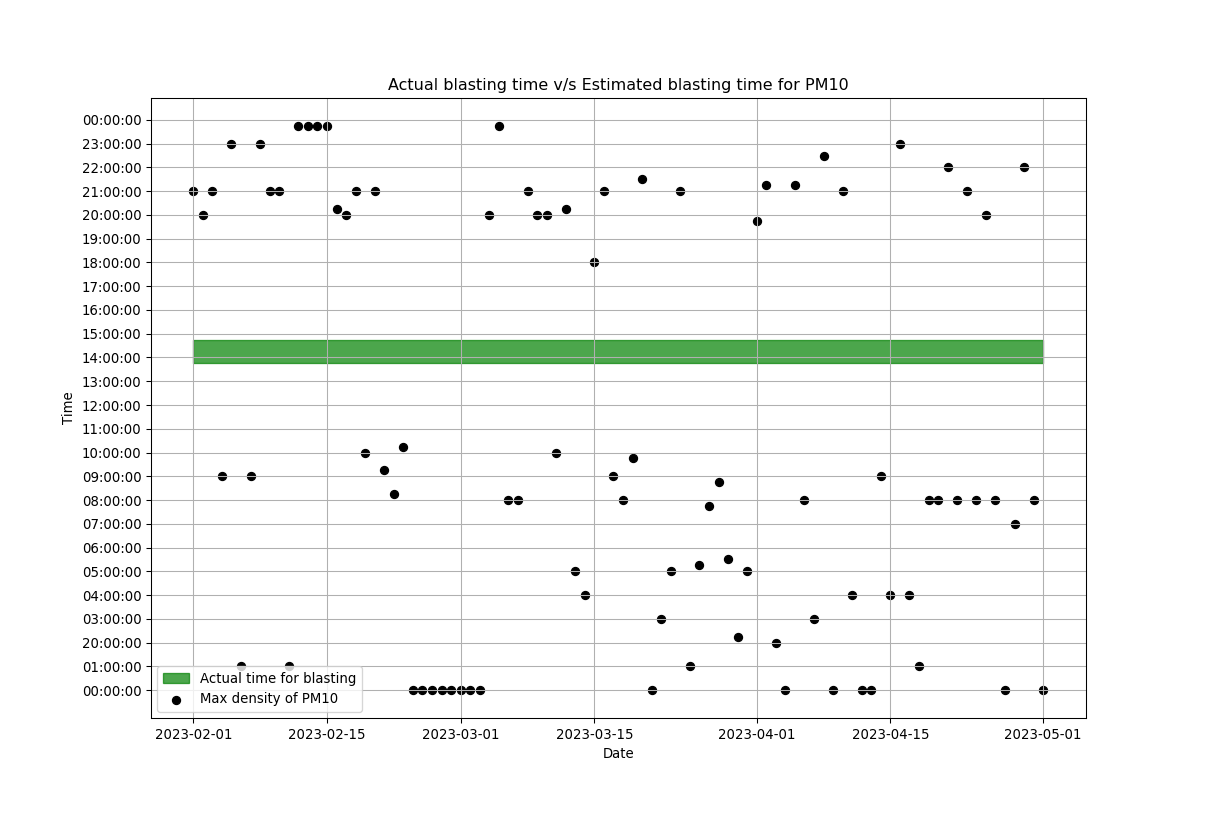

In [74]:
%matplotlib notebook

date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);

# df_max_time.drop('range_s',axis = 1, inplace = True)
# df_max_time.drop('range_e',axis = 1, inplace = True)
# for column in df_max_time.columns:
#     plt.scatter(date, df_max_time[column][date], label = column)
# for x in np.arange(1, 90):
#     for column in df_max_time.columns:
#         plt.scatter(df_max_time.index[x], df_max_time[column][df_max_time.index[x]])
plt.scatter(df_max_time.index, PM10, label = 'Max density of PM10', color = 'black')
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for PM10')
plt.show()

<IPython.core.display.Javascript object>


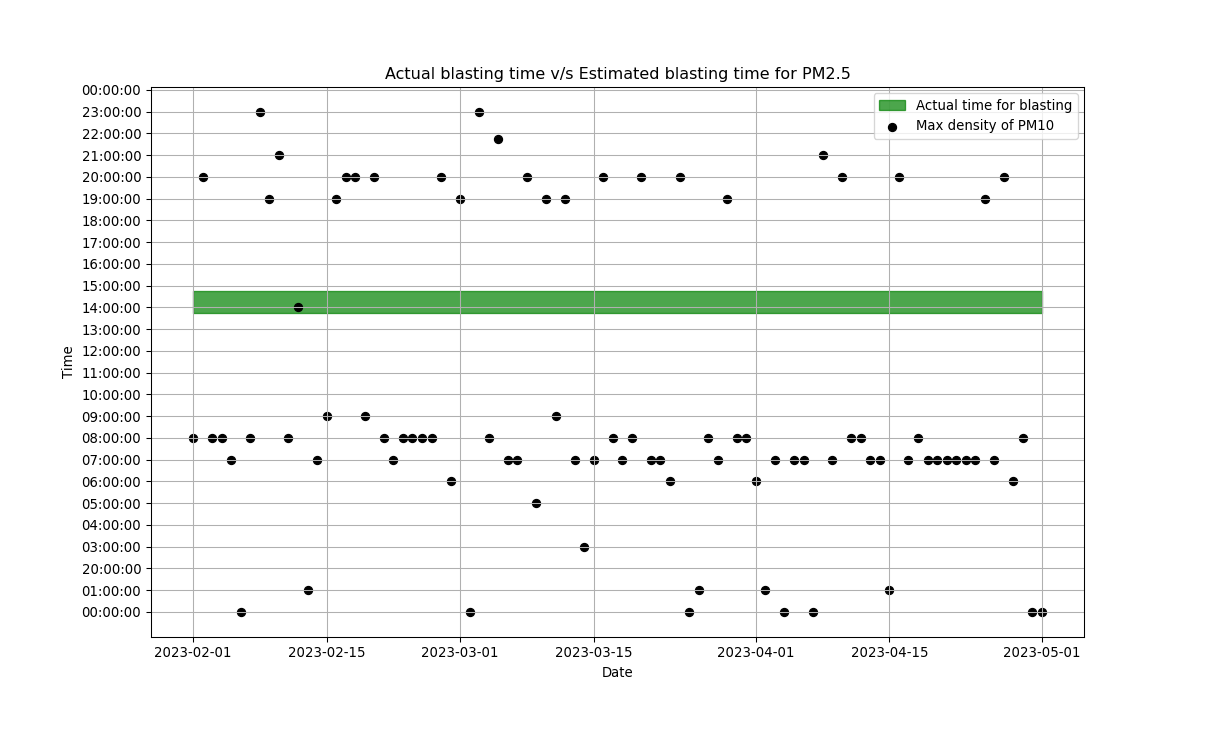

In [75]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
plt.scatter(df_max_time.index, PM25, label = 'Max density of PM10', color = 'black')
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for PM2.5')
plt.show()

<IPython.core.display.Javascript object>


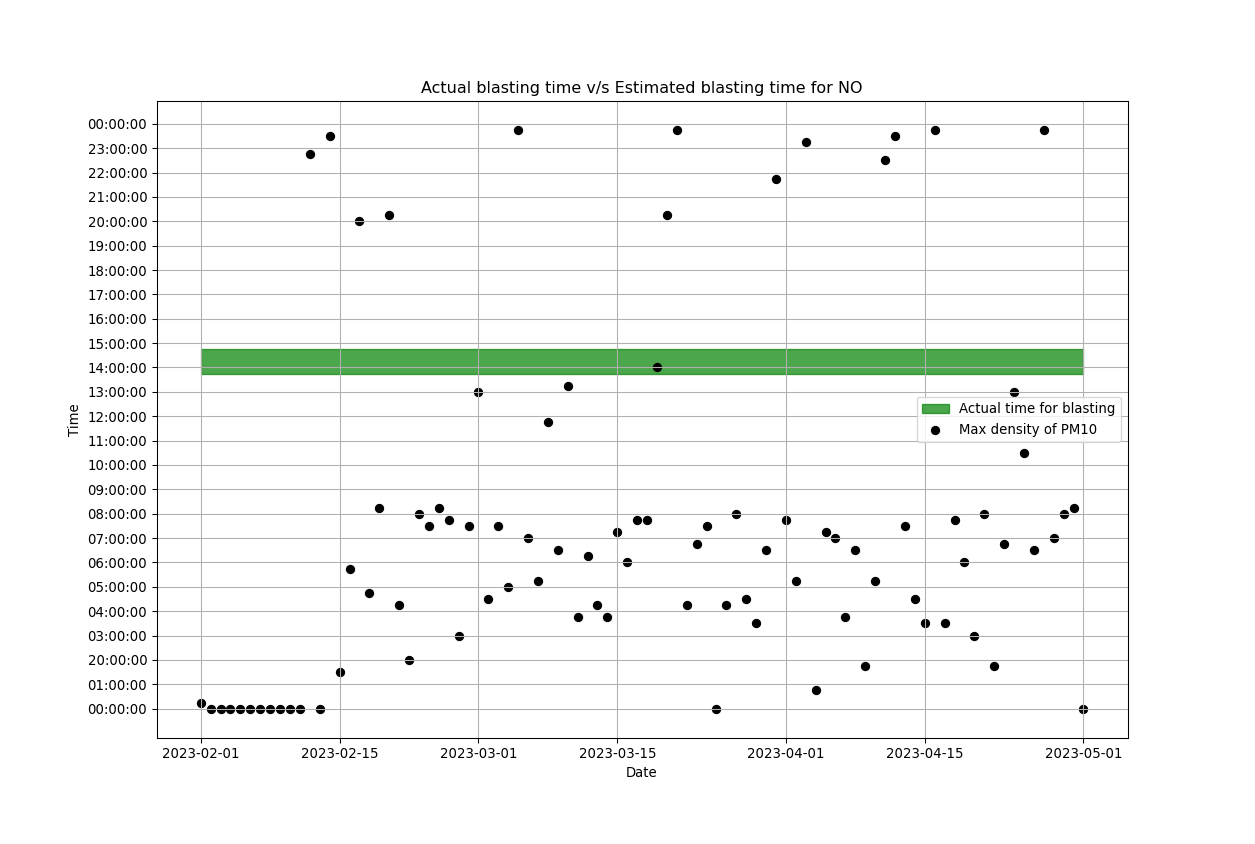

In [76]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
plt.scatter(df_max_time.index, NO, label = 'Max density of PM10', color = 'black')
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for NO')
plt.show()

<IPython.core.display.Javascript object>


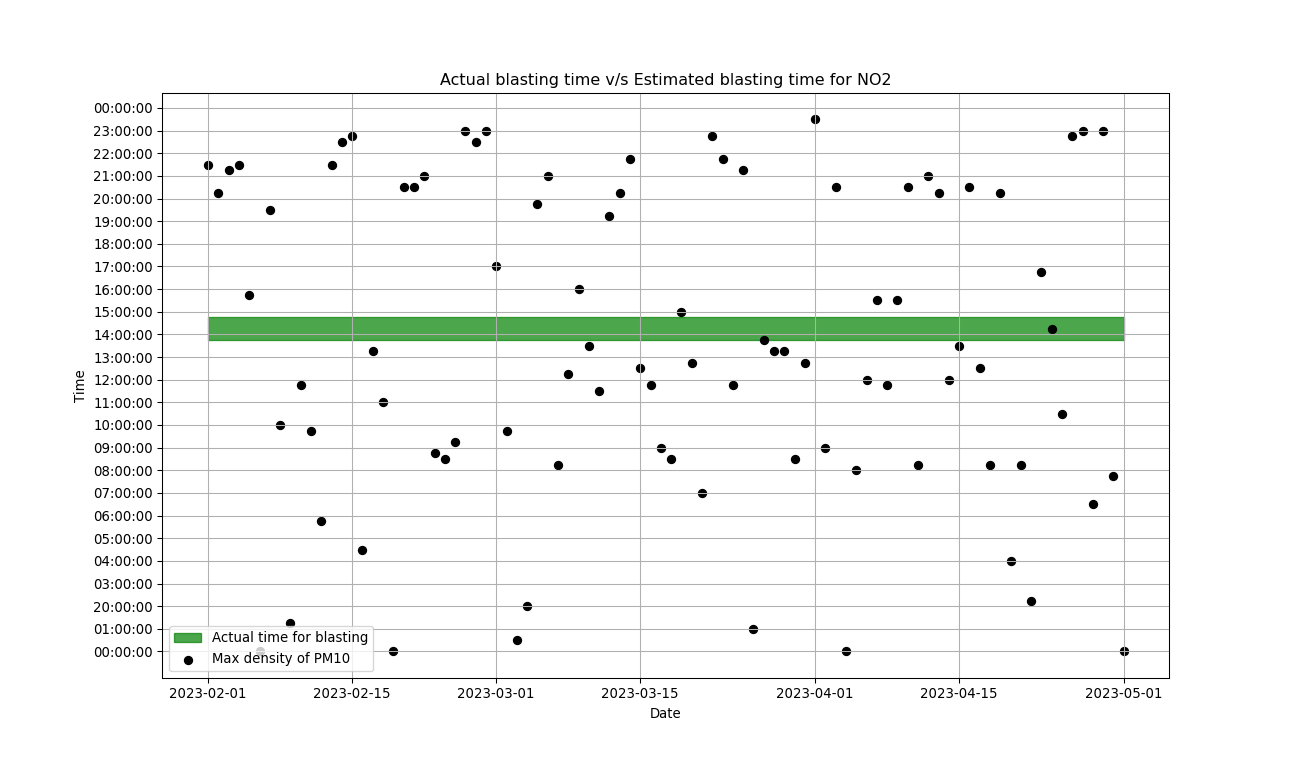

In [77]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
plt.scatter(df_max_time.index, NO2, label = 'Max density of PM10', color = 'black')
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for NO2')
plt.show()

<IPython.core.display.Javascript object>


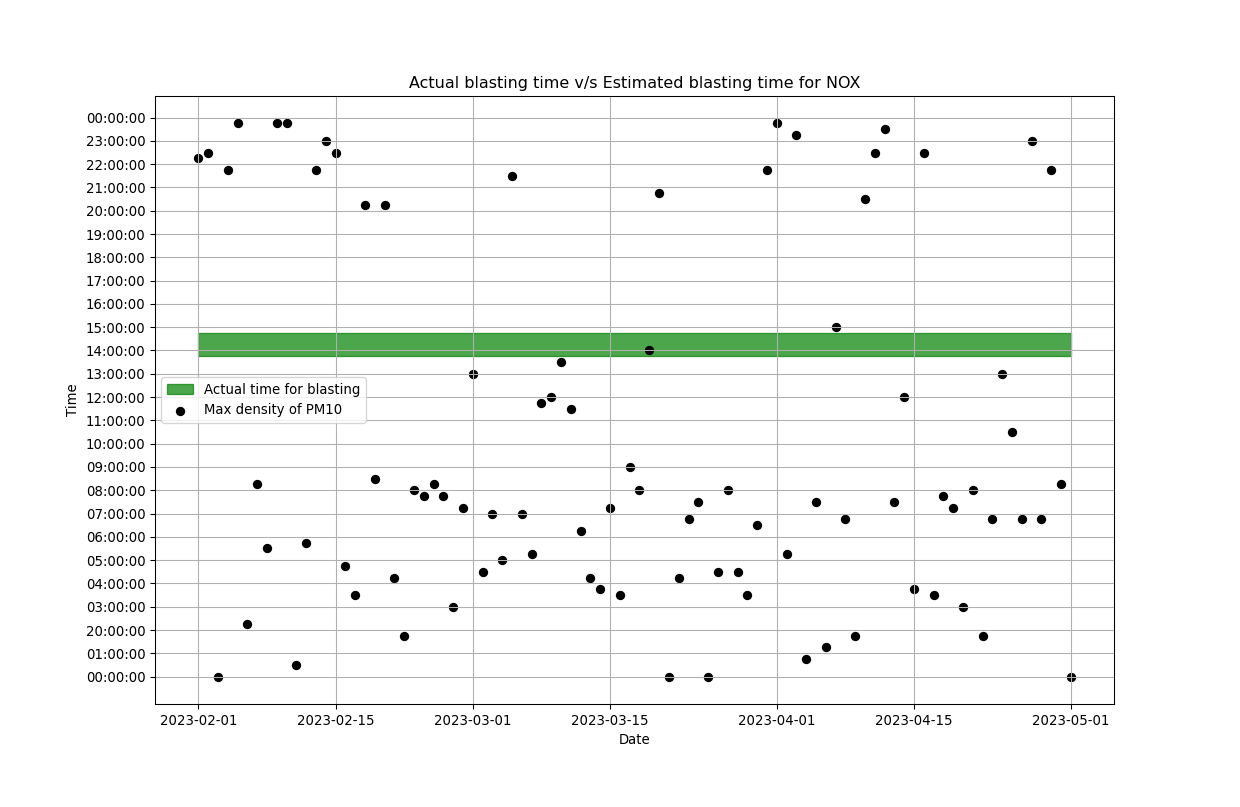

In [78]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
plt.scatter(df_max_time.index, NOX, label = 'Max density of PM10', color = 'black')
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for NOX')
plt.show()

<IPython.core.display.Javascript object>


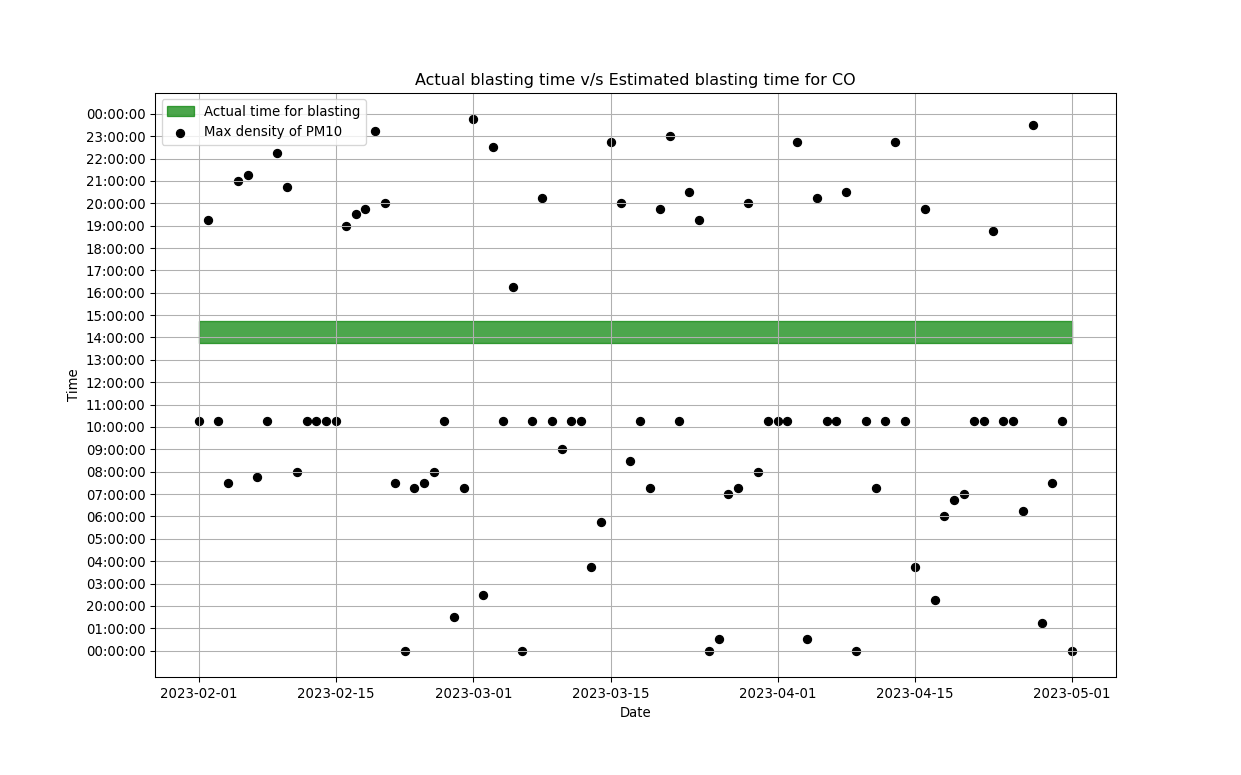

In [79]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
plt.scatter(df_max_time.index, CO, label = 'Max density of PM10', color = 'black')
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for CO')
plt.show()

<IPython.core.display.Javascript object>


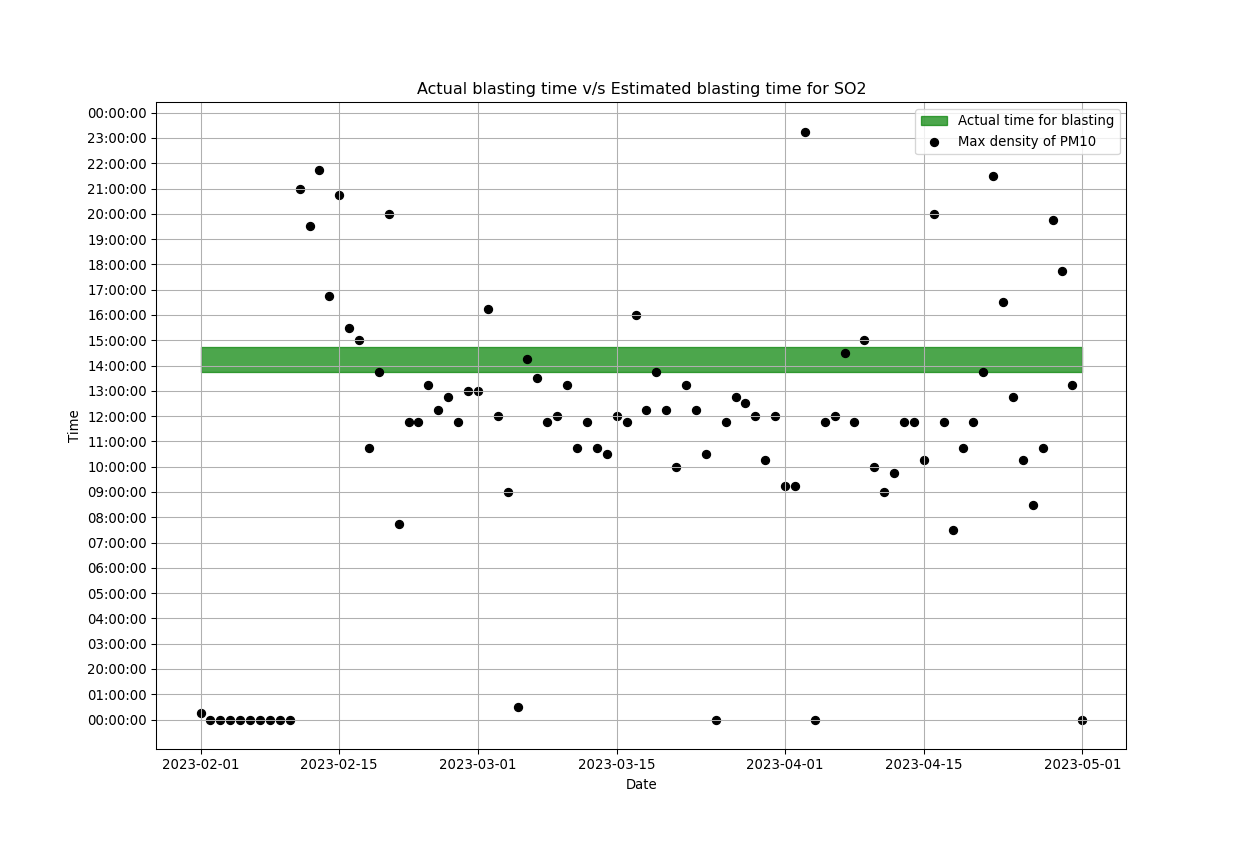

In [80]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
plt.scatter(df_max_time.index, SO2, label = 'Max density of PM10', color = 'black')
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for SO2')
plt.show()

<IPython.core.display.Javascript object>


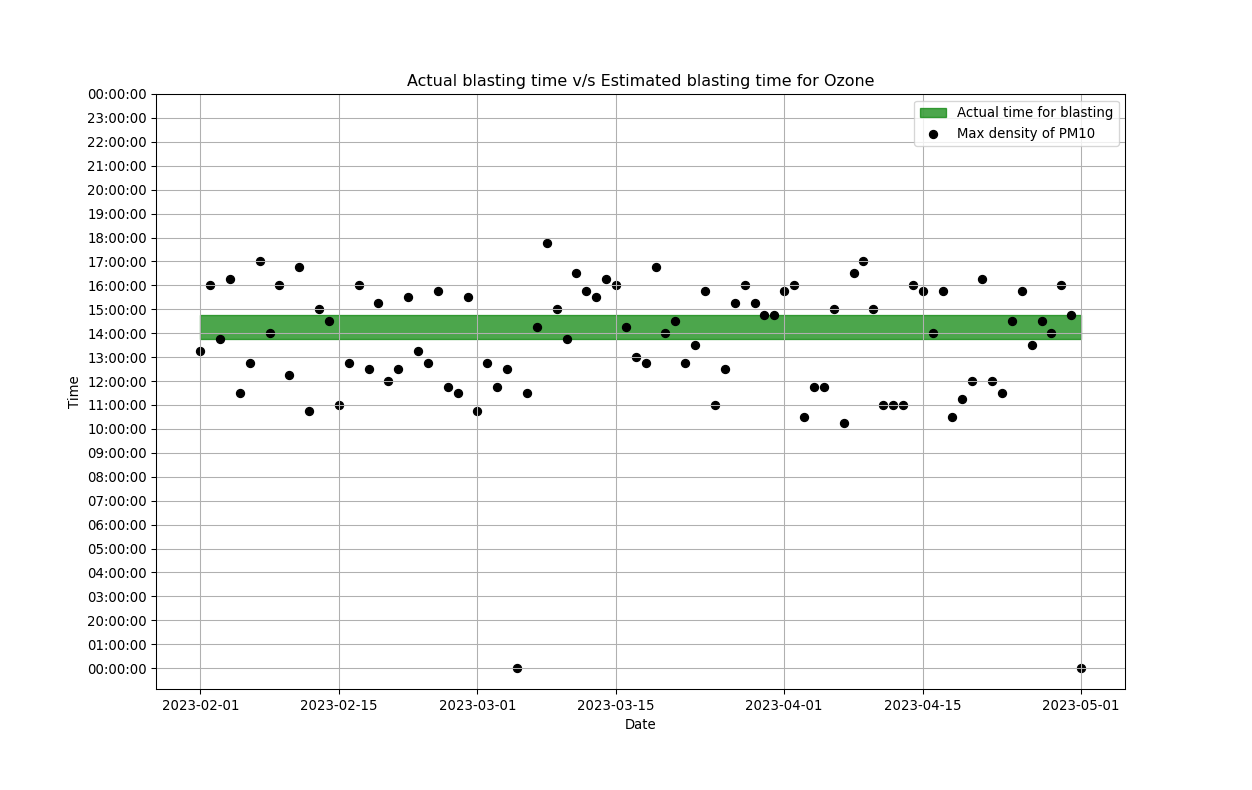

In [81]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
plt.scatter(df_max_time.index, OZONE, label = 'Max density of PM10', color = 'black')
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for Ozone')
plt.show()

<IPython.core.display.Javascript object>


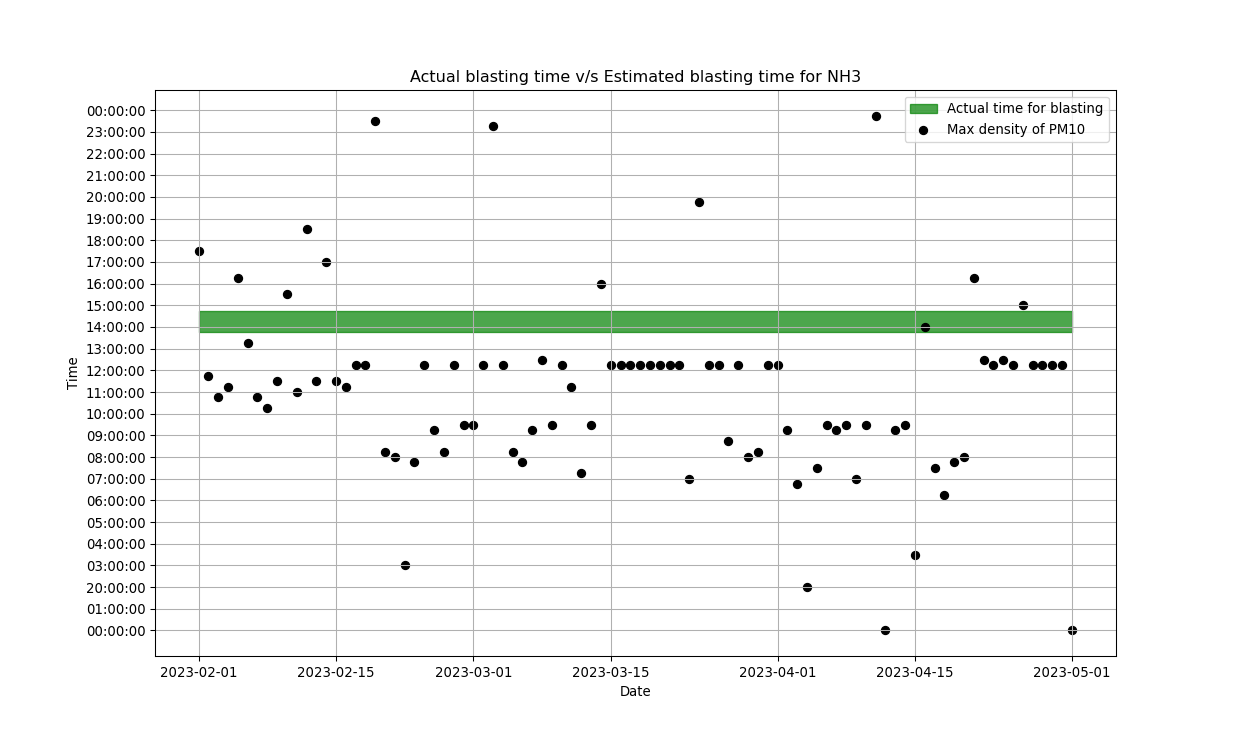

In [82]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
plt.scatter(df_max_time.index, NH3, label = 'Max density of PM10', color = 'black')
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for NH3')
plt.show()

<IPython.core.display.Javascript object>


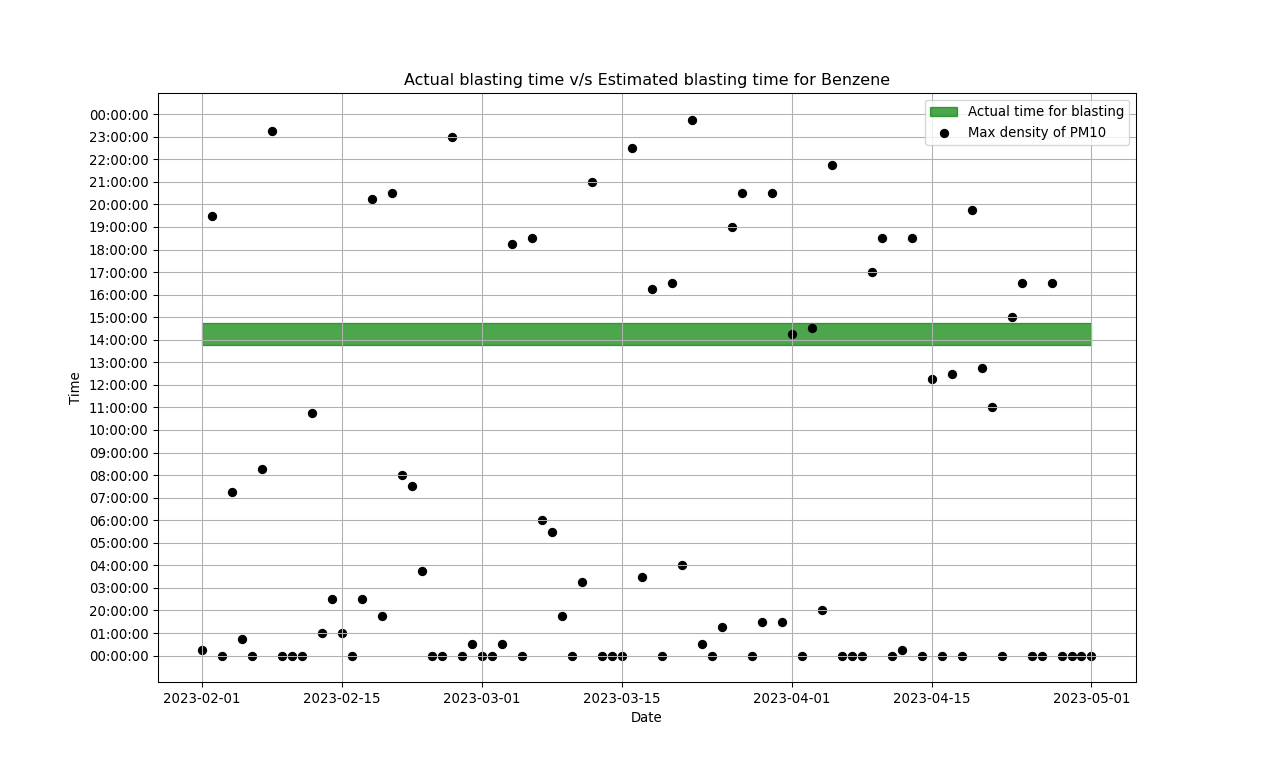

In [83]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
plt.scatter(df_max_time.index, BENZENE, label = 'Max density of PM10', color = 'black')
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for Benzene')
plt.show()

Plot for all the pollutants together

<IPython.core.display.Javascript object>


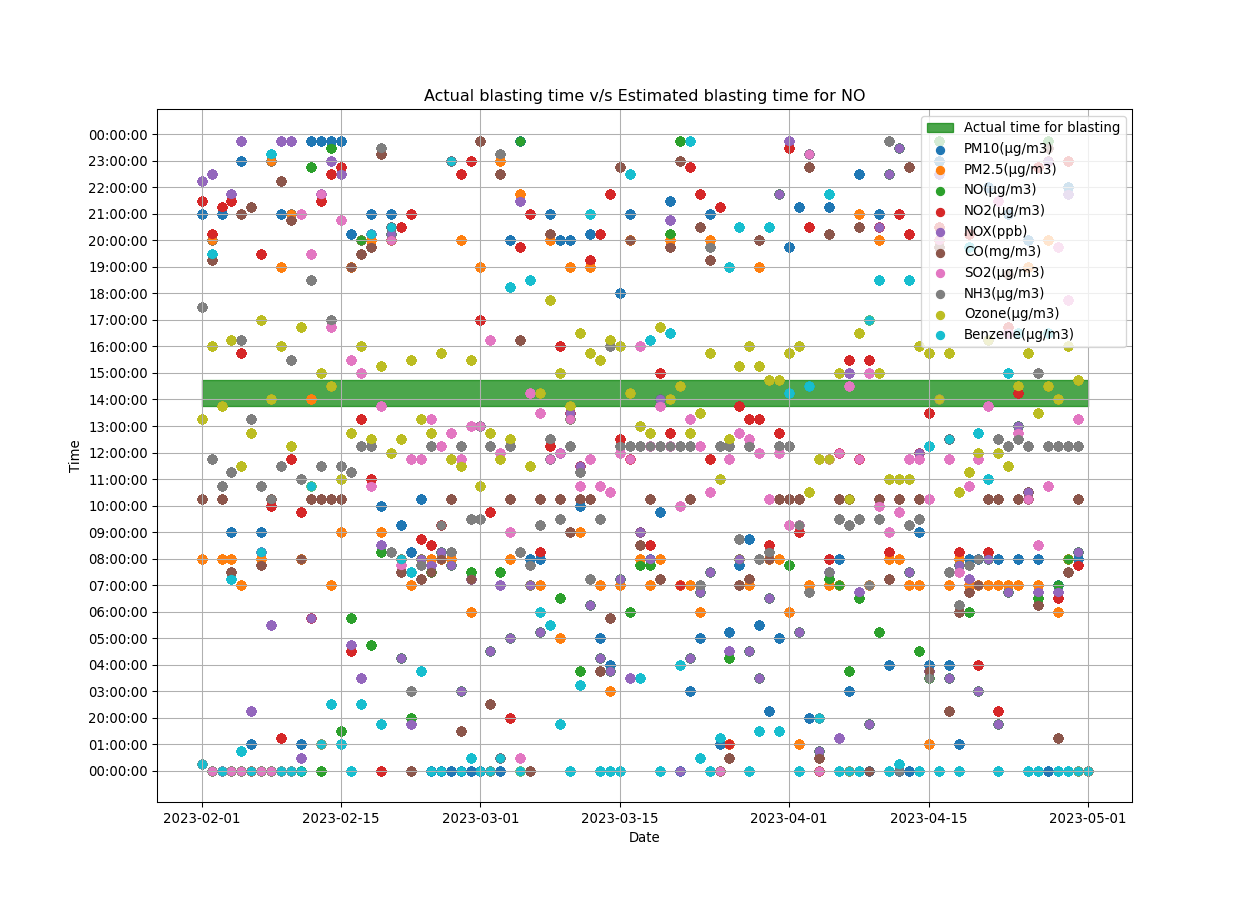

In [85]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
df_max_time.drop('range_s', axis=1, inplace=True)
df_max_time.drop('range_e', axis=1, inplace=True)
for column in df_max_time.columns :
    plt.scatter(df_max_time.index, df_max_time[column], label = column)
    
for x in np.arange(1, 90):
    for column in df_max_time.columns:
        plt.scatter(df_max_time.index, df_max_time[column])
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for NO')
plt.show()

# Plotting single time series by weighted combination

Now PM10, PM2.5 are mostly released in open pit mining and are also considered as most harmful so we give them the most wights and then to CO, NO, NO2, NOX and SO2. NH3 is barely relaeased in open pit mining also it is not so harmful, and ozone and benzene are also formed due to reaction of gases released but not directly released so we give them the lease weights

Weights

PM10 = 3x
PM2.5 = 3x
NO = 2x
NO2 = 2x
NOX = 2x
CO = 2x
SO2 = 2x
NH3 = x
OZONE = 1.5x 
BENZENE = 1.5x

weights = {
    'PM10(µg/m3)': 3/20,
    'PM2.5(µg/m3)': 3/20,
    'NO(µg/m3)': 2/20,
    'NO2(µg/m3)': 2/20,
    'NOX(ppb)': 2/20,
    'CO(mg/m3)': 2/20,
    'SO2(µg/m3)': 2/20,
    'NH3(µg/m3)': 1/20,
    'Ozone(µg/m3)': 3/40,
    'Benzene(µg/m3)': 3/40
}

In [91]:
weights

{'PM10(µg/m3)': 0.15,
 'PM2.5(µg/m3)': 0.15,
 'NO(µg/m3)': 0.1,
 'NO2(µg/m3)': 0.1,
 'NOX(ppb)': 0.1,
 'CO(mg/m3)': 0.1,
 'SO2(µg/m3)': 0.1,
 'NH3(µg/m3)': 0.05,
 'Ozone(µg/m3)': 0.075,
 'Benzene(µg/m3)': 0.075}

Combined Pollution

In [92]:
file_loc = r'C:\Users\nkuma\Downloads\EE 798Q\Interpolated Data'
air_pollution_data = pd.read_csv(file_loc, index_col=0,  header = 0)

In [93]:
air_pollution_data.head(1)

PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  NO2(µg/m3)  \
To                                                                      
2023-02-01 00:15:00         95.0          35.0       18.1        90.1   

                     NOX(ppb)  CO(mg/m3)  SO2(µg/m3)  NH3(µg/m3)  \
To                                                                 
2023-02-01 00:15:00      56.2       0.31         8.2        17.7   

                     Ozone(µg/m3)  Benzene(µg/m3)  
To                                                 
2023-02-01 00:15:00          28.1             0.4

In [94]:
df = pd.DataFrame(air_pollution_data)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8640 entries, 2023-02-01 00:15:00 to 2023-05-02 00:00:00
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PM10(µg/m3)     8640 non-null   float64
 1   PM2.5(µg/m3)    8640 non-null   float64
 2   NO(µg/m3)       8640 non-null   float64
 3   NO2(µg/m3)      8640 non-null   float64
 4   NOX(ppb)        8640 non-null   float64
 5   CO(mg/m3)       8640 non-null   float64
 6   SO2(µg/m3)      8640 non-null   float64
 7   NH3(µg/m3)      8640 non-null   float64
 8   Ozone(µg/m3)    8640 non-null   float64
 9   Benzene(µg/m3)  8232 non-null   float64
dtypes: float64(10)
memory usage: 742.5+ KB


In [98]:
df['Benzene(µg/m3)'].fillna(method = 'ffill', inplace = True)
df['Benzene(µg/m3)'].info()

<class 'pandas.core.series.Series'>
Index: 8640 entries, 2023-02-01 00:15:00 to 2023-05-02 00:00:00
Series name: Benzene(µg/m3)
Non-Null Count  Dtype  
--------------  -----  
8640 non-null   float64
dtypes: float64(1)
memory usage: 393.0+ KB


In [99]:
PM10 = df['PM10(µg/m3)']
PM25 = df['PM2.5(µg/m3)']
NO = df['NO(µg/m3)']
NO2 = df['NO2(µg/m3)']
NOX = df['NOX(ppb)']
CO = df['CO(mg/m3)']
SO2 = df['SO2(µg/m3)']
NH3 = df['NH3(µg/m3)']
OZONE = df['Ozone(µg/m3)']
BENZENE = df['Benzene(µg/m3)']

In [101]:
df['total_pollution'] = (PM10*weights['PM10(µg/m3)'] + PM25*weights['PM2.5(µg/m3)'] + NO*weights['NO(µg/m3)'] + NO2*weights['NO2(µg/m3)'] + ((NOX*weights['NOX(ppb)']*46.01)/24.45) + (CO*weights['CO(mg/m3)']*1000) + SO2*weights['SO2(µg/m3)'] + NH3*weights['NH3(µg/m3)'] + OZONE*weights['Ozone(µg/m3)'] + BENZENE*weights['Benzene(µg/m3)'])

In [102]:
df.head()

PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  NO2(µg/m3)  \
To                                                                      
2023-02-01 00:15:00         95.0          35.0       18.1        90.1   
2023-02-01 00:30:00         95.0          35.0       18.1        88.0   
2023-02-01 00:45:00         95.0          35.0       18.1        87.7   
2023-02-01 01:00:00        122.0          34.0       18.1        88.9   
2023-02-01 01:15:00        122.0          34.0       18.1        90.0   

                     NOX(ppb)  CO(mg/m3)  SO2(µg/m3)  NH3(µg/m3)  \
To                                                                 
2023-02-01 00:15:00      56.2       0.31         8.2        17.7   
2023-02-01 00:30:00      55.1       0.33         8.2        18.3   
2023-02-01 00:45:00      55.2       0.38         8.2        19.7   
2023-02-01 01:00:00      55.7       0.38         8.2        21.3   
2023-02-01 01:15:00      55.8       0.38         8.2        22.3   

                     Ozone(µg/m3)  Benzene(µg/m3)  total_pollution  
To                                                                  
2023-02-01 00:15:00          28.1             0.4        75.738214  
2023-02-01 00:30:00          27.1             0.4        77.276216  
2023-02-01 00:45:00          24.9             0.4        82.170034  
2023-02-01 01:00:00          21.9             0.4        86.139124  
2023-02-01 01:15:00          16.7             0.4        85.927942

In [103]:
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d %H:%M:%S')

In [104]:
df.head(1)

PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  NO2(µg/m3)  \
To                                                                      
2023-02-01 00:15:00         95.0          35.0       18.1        90.1   

                     NOX(ppb)  CO(mg/m3)  SO2(µg/m3)  NH3(µg/m3)  \
To                                                                 
2023-02-01 00:15:00      56.2       0.31         8.2        17.7   

                     Ozone(µg/m3)  Benzene(µg/m3)  total_pollution  
To                                                                  
2023-02-01 00:15:00          28.1             0.4        75.738214

<IPython.core.display.Javascript object>


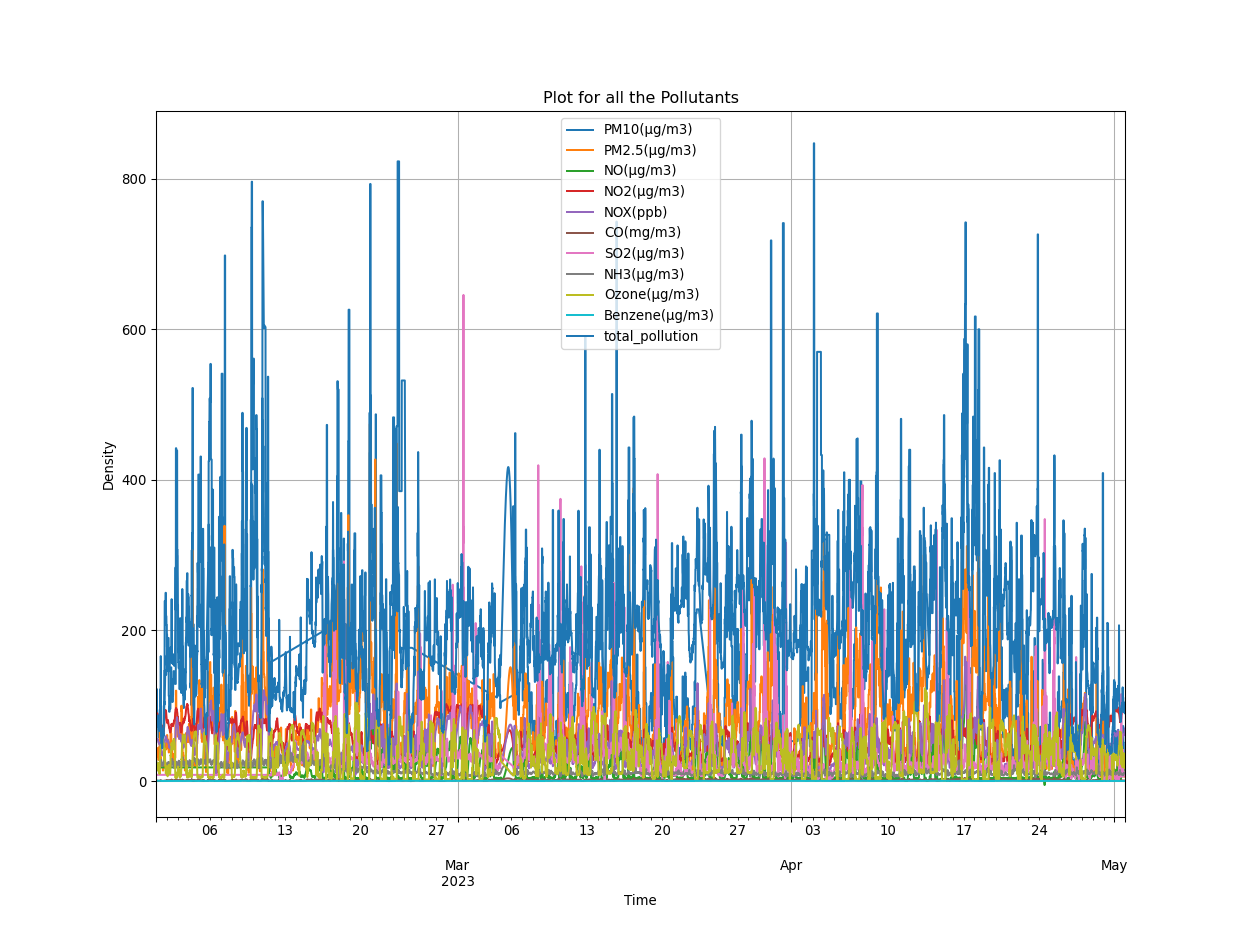

In [113]:
%matplotlib notebook
df.plot()
plt.grid()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Plot for all the Pollutants')
plt.show()

<IPython.core.display.Javascript object>


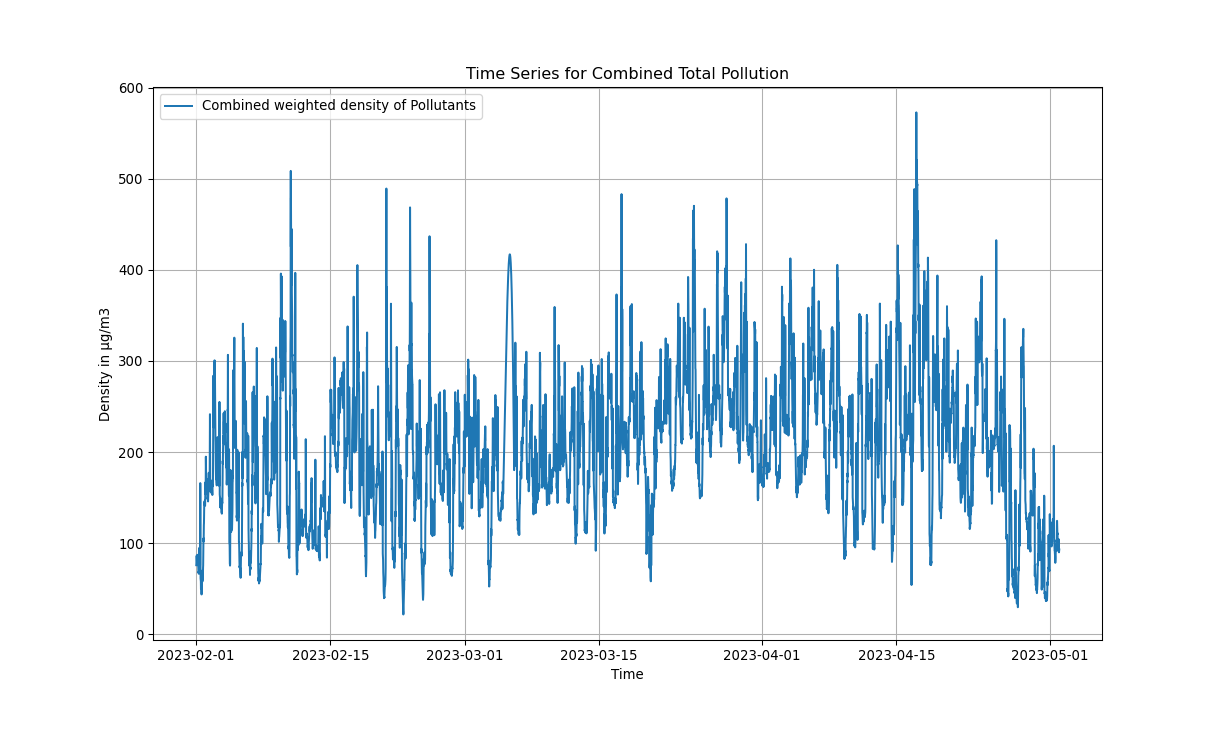

In [112]:
%matplotlib notebook
plt.plot(df.index, df['total_pollution'], label = 'Combined weighted density of Pollutants')
plt.xlabel('Time')
plt.ylabel('Density in µg/m3')
plt.title('Time Series for Combined Total Pollution')
plt.grid()
plt.legend()
plt.show()

Above curve is almost stationary

Now we will split the training and testing data and try to predict the total pollution in future

In [115]:
t = df.index[8000]
t

Timestamp('2023-04-25 08:15:00')

In [116]:
mask = (df.index <= t)
training_data = df[mask].copy()
testing_data = df[~mask].copy()

<IPython.core.display.Javascript object>


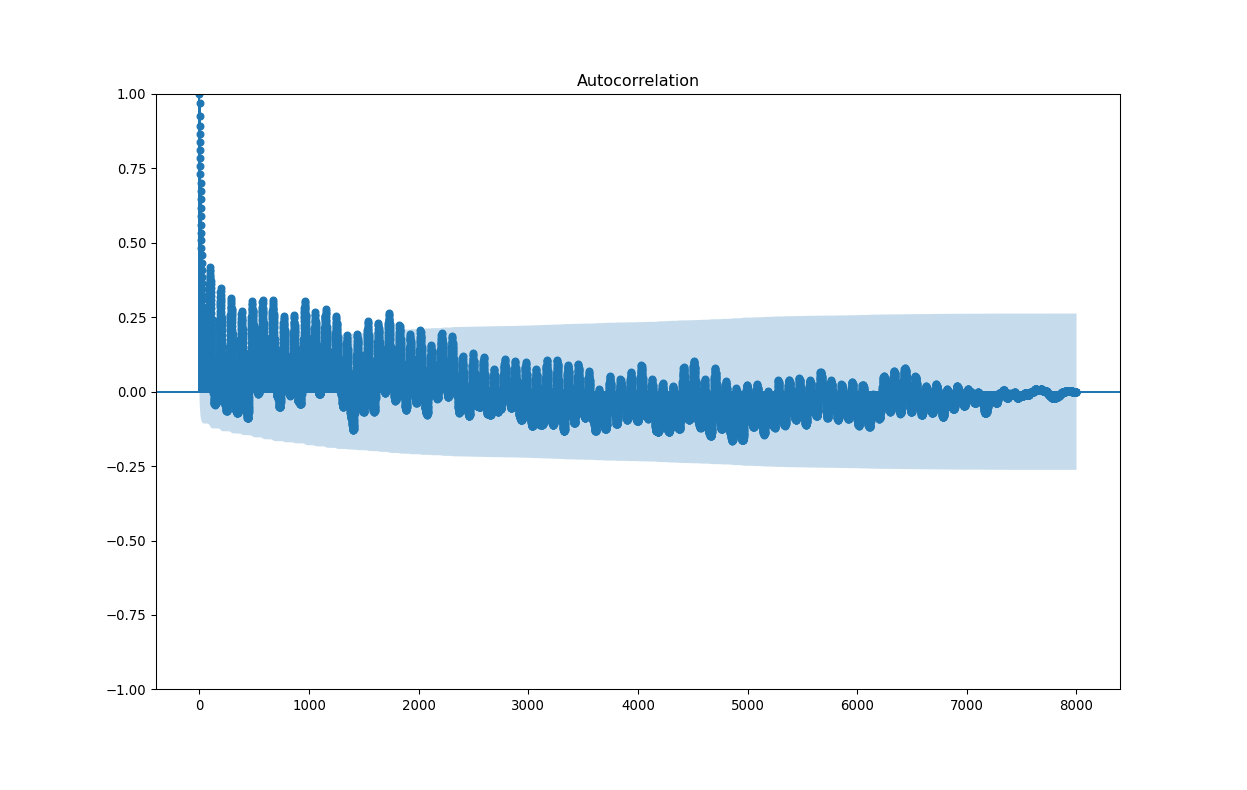

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


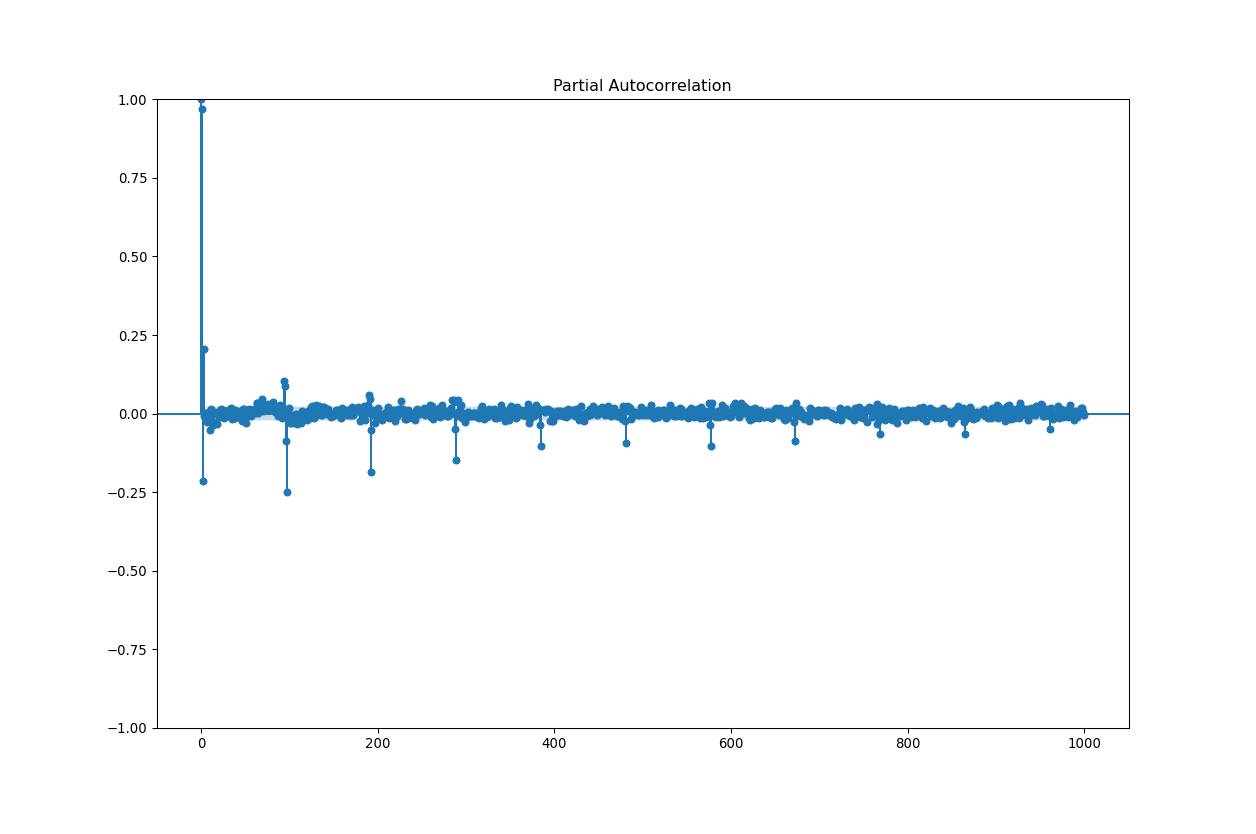

In [118]:
acf_plot = plot_acf(training_data['total_pollution'], lags = 8000)
pacf_plot = plot_pacf(training_data['total_pollution'], lags = 1000)

In [119]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(training_data['total_pollution'])
print(f'p-value : {adf_test[1]}')

p-value : 3.160798535205743e-22


Small p value suggests that the graph is stationary

In [120]:
from pmdarima.arima import auto_arima

def arimamodel(timeseriesarray) :
    autoarima_model = auto_arima(timeseriesarray, start_p=0, start_q=0, max_p=5, max_q=3, d=0, test="adf", trace = True)
    return autoarima_model

In [121]:
arima_model = arimamodel(training_data['total_pollution'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=91853.221, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=69520.999, Time=0.81 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=82579.477, Time=1.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=109094.741, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=69142.790, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=68802.602, Time=1.51 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=68804.167, Time=2.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=68804.134, Time=3.85 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=68899.751, Time=4.45 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=68806.108, Time=7.21 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.33 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 22.930 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8001
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -34396.301
Date:                Wed, 28 Jun 2023   AIC                          68802.602
Time:                        20:27:26   BIC                          68837.538
Sample:                    02-01-2023   HQIC                         68814.560
                         - 04-25-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.3099      0.680      9.283      0.000       4.978       7.642
ar.L1          1.2215      0.006    197.026      0.000       1.209       1.234
ar.L2         -0.4563      0.008    -54.089      0.000      -0.473      -0.440
ar.L3          0.2044      0.006     32.184      0.000       0.192       0.217
sigma2       317.2645      2.249    141.077      0.000     312.857     321.672
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             24583.64
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.10
Prob(H) (two-sided):                  0.37   Kurtosis:                        11.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<IPython.core.display.Javascript object>


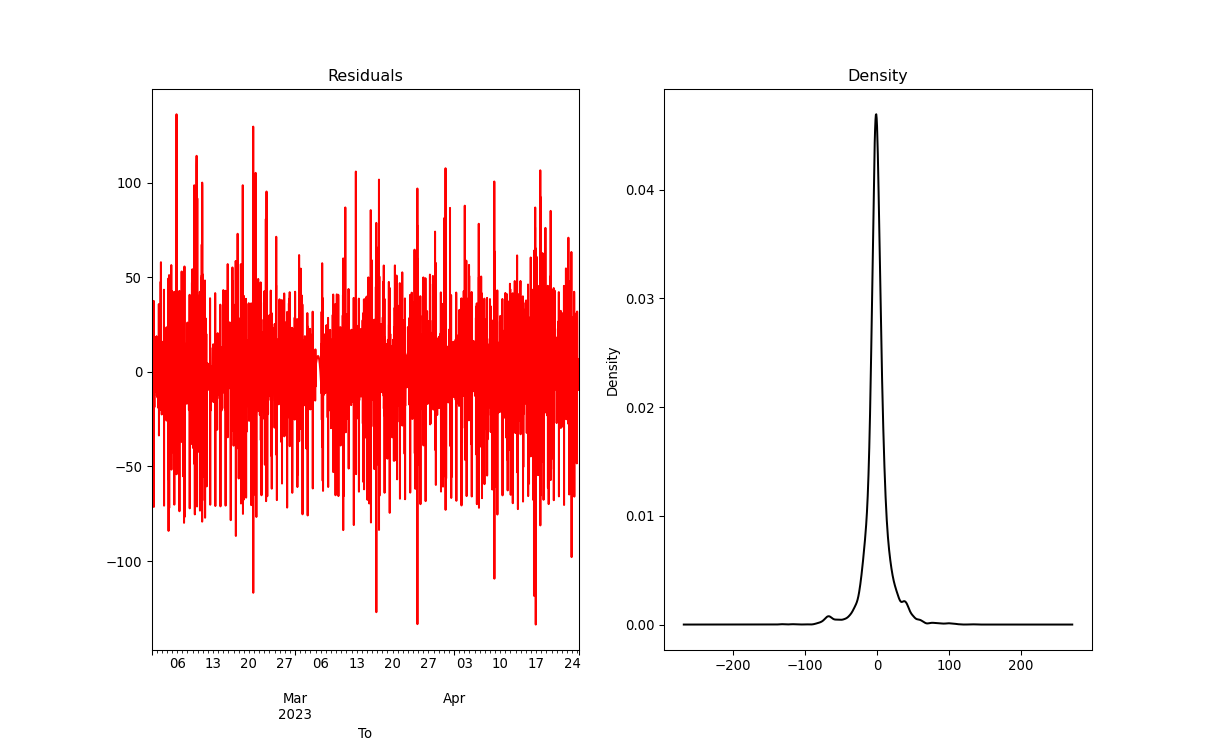

In [126]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(training_data['total_pollution'], order=(3, 0, 0))  # Replace p, d, q with appropriate values
arima_model_fit = arima_model.fit()

# Access the residuals
residuals = arima_model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title = 'Residuals' , ax = ax[0] ,color = 'r')
residuals.plot(title = 'Density', kind = 'kde', ax = ax[1], color = 'black')
plt.show()

White Noise Residual

In [122]:
test_auto = arima_model.predict(n_periods = len(testing_data['total_pollution']))
df['total_pollution_forecast'] = [None]*len(training_data['total_pollution']) + list(test_auto)

<IPython.core.display.Javascript object>


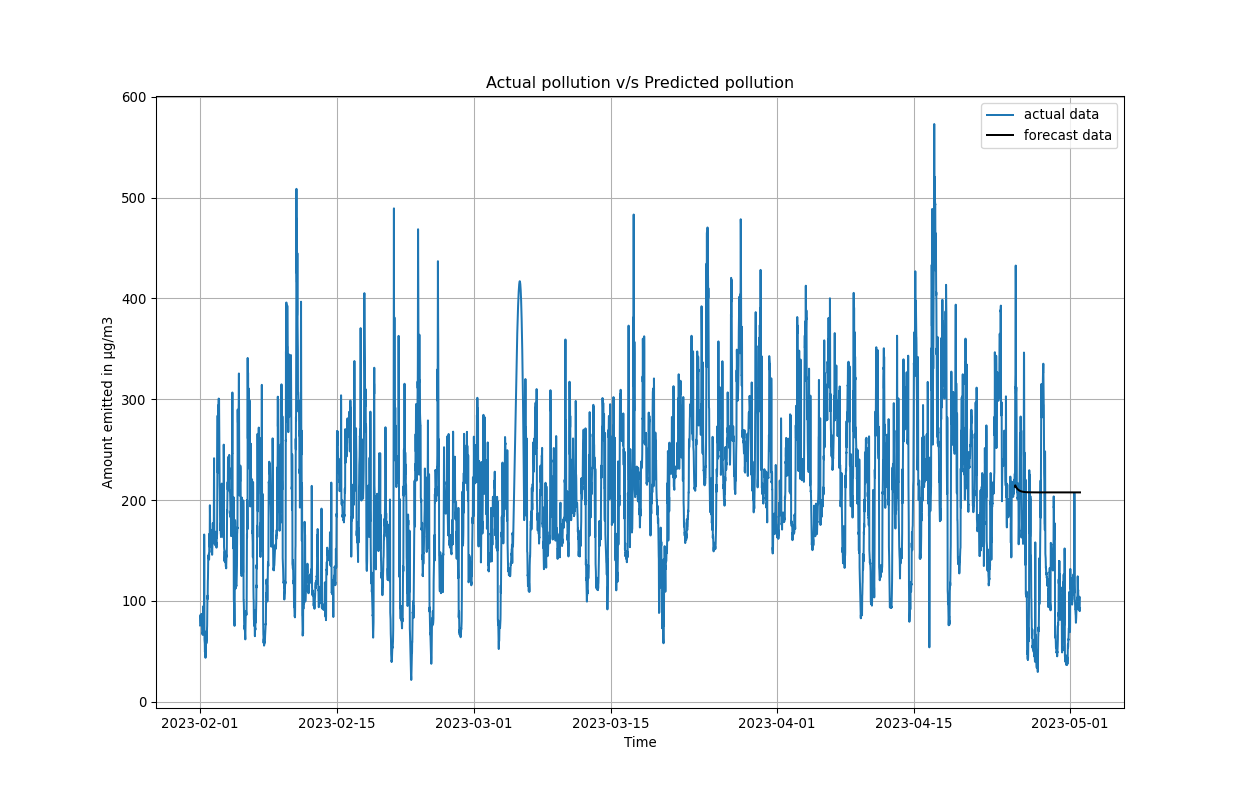

In [123]:
%matplotlib notebook
plt.plot(df['total_pollution'], label='actual data')
plt.plot(df['total_pollution_forecast'], label='forecast data', color = 'black')
plt.xlabel('Time')
plt.ylabel('Amount emitted in µg/m3')
plt.title('Actual pollution v/s Predicted pollution')
plt.grid()
plt.legend()
plt.show()

In [124]:
def mean_absolute_percentage_error(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                        K.epsilon(),
                                        None))
    return 100. * K.mean(diff, axis=-1)

In [125]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(testing_data['total_pollution'], test_auto)
mape = mean_absolute_percentage_error(testing_data['total_pollution'], test_auto)
rmse = np.sqrt(mean_squared_error(testing_data['total_pollution'], test_auto))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 97.71661804840203
mape : 1.305412332254473
rmse : 108.97147366583111


In [128]:
start_date = '2023-02-01'
end_date = '2023-05-01'
freq = '15Min'
date_range = pd.date_range(start=start_date, end=end_date, freq=freq)
df = df.reindex(date_range)
max_per_day = df.groupby(df.index.date).max()
max_per_day

PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  NO2(µg/m3)    NOX(ppb)  \
2023-02-01        250.0     68.000000  18.100000   93.900000   59.500000   
2023-02-02        442.0    120.000000  18.100000   97.000000   84.700000   
2023-02-03        276.0    100.000000  18.100000  102.400000   75.000000   
2023-02-04        522.0    306.000000  18.100000   96.100000   74.900000   
2023-02-05        508.0    151.000000  18.100000   87.877988  100.200000   
...                 ...           ...        ...         ...         ...   
2023-04-27        246.0    114.000000  20.600000   95.000000   65.400000   
2023-04-28        323.0    117.000000  78.700000   98.800000  115.700000   
2023-04-29        409.0    129.000000  14.900000   98.800000   61.700000   
2023-04-30        210.0     95.000000  18.600000   99.100000   67.300000   
2023-05-01         92.0      9.330628  15.306241   96.641563   64.060722   

            CO(mg/m3)  SO2(µg/m3)  NH3(µg/m3)  Ozone(µg/m3)  Benzene(µg/m3)  \
2023-02-01   1.225741         8.2   30.300000         59.80             0.4   
2023-02-02   2.260000         8.2   29.100000         55.80             0.2   
2023-02-03   1.960136         8.2   31.900000         61.70             0.2   
2023-02-04   2.340000         8.2   31.600000         66.00             0.3   
2023-02-05   2.380000         8.2   50.218117         64.50             0.3   
...               ...         ...         ...           ...             ...   
2023-04-27   1.520000       164.7   18.213843         74.10             0.3   
2023-04-28   2.470000        53.8   14.312913         74.50             0.1   
2023-04-29   1.710000        66.4   20.603935         68.50             0.1   
2023-04-30   1.224610        32.8   15.401601         46.00             0.1   
2023-05-01   0.676003         7.0   10.649005         31.15             0.2   

            total_pollution  total_pollution_forecast  
2023-02-01       166.634668                       NaN  
2023-02-02       300.708801                       NaN  
2023-02-03       255.015415                       NaN  
2023-02-04       325.589501                       NaN  
2023-02-05       340.976791                       NaN  
...                     ...                       ...  
2023-04-27       219.516561                207.700922  
2023-04-28       335.284524                207.658138  
2023-04-29       203.681436                207.656200  
2023-04-30       152.067912                207.656112  
2023-05-01       109.633292                207.656108  

[90 rows x 12 columns]

In [129]:
max_per_day.drop('total_pollution_forecast', axis = 1, inplace = True)

In [130]:
max_per_day.head(1)

PM10(µg/m3)  PM2.5(µg/m3)  NO(µg/m3)  NO2(µg/m3)  NOX(ppb)  \
2023-02-01        250.0          68.0       18.1        93.9      59.5   

            CO(mg/m3)  SO2(µg/m3)  NH3(µg/m3)  Ozone(µg/m3)  Benzene(µg/m3)  \
2023-02-01   1.225741         8.2        30.3          59.8             0.4   

            total_pollution  
2023-02-01       166.634668

In [131]:
df_max_time = max_per_day.copy()

for column in max_per_day.columns:
    daily_max = df[column].resample('D').max()
    max_time_per_day = df.resample('D')[column].idxmax().dt.time
    result = pd.DataFrame({'Max Value': daily_max, 'Time of Max': max_time_per_day})
    df_max_time[column] = result['Time of Max']
df_max_time


PM10(µg/m3) PM2.5(µg/m3) NO(µg/m3) NO2(µg/m3)  NOX(ppb) CO(mg/m3)  \
2023-02-01    21:00:00     08:00:00  00:15:00   21:30:00  22:15:00  10:15:00   
2023-02-02    20:00:00     20:00:00  00:00:00   20:15:00  22:30:00  19:15:00   
2023-02-03    21:00:00     08:00:00  00:00:00   21:15:00  00:00:00  10:15:00   
2023-02-04    09:00:00     08:00:00  00:00:00   21:30:00  21:45:00  07:30:00   
2023-02-05    23:00:00     07:00:00  00:00:00   15:45:00  23:45:00  21:00:00   
...                ...          ...       ...        ...       ...       ...   
2023-04-27    00:00:00     20:00:00  23:45:00   23:00:00  23:00:00  23:30:00   
2023-04-28    07:00:00     06:00:00  07:00:00   06:30:00  06:45:00  01:15:00   
2023-04-29    22:00:00     08:00:00  08:00:00   23:00:00  21:45:00  07:30:00   
2023-04-30    08:00:00     00:00:00  08:15:00   07:45:00  08:15:00  10:15:00   
2023-05-01    00:00:00     00:00:00  00:00:00   00:00:00  00:00:00  00:00:00   

           SO2(µg/m3) NH3(µg/m3) Ozone(µg/m3) Benzene(µg/m3) total_pollution  
2023-02-01   00:15:00   17:30:00     13:15:00       00:15:00        23:00:00  
2023-02-02   00:00:00   11:45:00     16:00:00       19:30:00        22:00:00  
2023-02-03   00:00:00   10:45:00     13:45:00       00:00:00        10:15:00  
2023-02-04   00:00:00   11:15:00     16:15:00       07:15:00        23:30:00  
2023-02-05   00:00:00   16:15:00     11:30:00       00:45:00        21:00:00  
...               ...        ...          ...            ...             ...  
2023-04-27   10:45:00   12:15:00     14:30:00       16:30:00        23:30:00  
2023-04-28   19:45:00   12:15:00     14:00:00       00:00:00        06:00:00  
2023-04-29   17:45:00   12:15:00     16:00:00       00:00:00        07:30:00  
2023-04-30   13:15:00   12:15:00     14:45:00       00:00:00        10:15:00  
2023-05-01   00:00:00   00:00:00     00:00:00       00:00:00        00:00:00  

[90 rows x 11 columns]

In [132]:
df_max_time['range_s'] = np.full(len(df_max_time), '13:45:00')
df_max_time['range_e'] = np.full(len(df_max_time), '14:45:00')
df_max_time

PM10(µg/m3) PM2.5(µg/m3) NO(µg/m3) NO2(µg/m3)  NOX(ppb) CO(mg/m3)  \
2023-02-01    21:00:00     08:00:00  00:15:00   21:30:00  22:15:00  10:15:00   
2023-02-02    20:00:00     20:00:00  00:00:00   20:15:00  22:30:00  19:15:00   
2023-02-03    21:00:00     08:00:00  00:00:00   21:15:00  00:00:00  10:15:00   
2023-02-04    09:00:00     08:00:00  00:00:00   21:30:00  21:45:00  07:30:00   
2023-02-05    23:00:00     07:00:00  00:00:00   15:45:00  23:45:00  21:00:00   
...                ...          ...       ...        ...       ...       ...   
2023-04-27    00:00:00     20:00:00  23:45:00   23:00:00  23:00:00  23:30:00   
2023-04-28    07:00:00     06:00:00  07:00:00   06:30:00  06:45:00  01:15:00   
2023-04-29    22:00:00     08:00:00  08:00:00   23:00:00  21:45:00  07:30:00   
2023-04-30    08:00:00     00:00:00  08:15:00   07:45:00  08:15:00  10:15:00   
2023-05-01    00:00:00     00:00:00  00:00:00   00:00:00  00:00:00  00:00:00   

           SO2(µg/m3) NH3(µg/m3) Ozone(µg/m3) Benzene(µg/m3) total_pollution  \
2023-02-01   00:15:00   17:30:00     13:15:00       00:15:00        23:00:00   
2023-02-02   00:00:00   11:45:00     16:00:00       19:30:00        22:00:00   
2023-02-03   00:00:00   10:45:00     13:45:00       00:00:00        10:15:00   
2023-02-04   00:00:00   11:15:00     16:15:00       07:15:00        23:30:00   
2023-02-05   00:00:00   16:15:00     11:30:00       00:45:00        21:00:00   
...               ...        ...          ...            ...             ...   
2023-04-27   10:45:00   12:15:00     14:30:00       16:30:00        23:30:00   
2023-04-28   19:45:00   12:15:00     14:00:00       00:00:00        06:00:00   
2023-04-29   17:45:00   12:15:00     16:00:00       00:00:00        07:30:00   
2023-04-30   13:15:00   12:15:00     14:45:00       00:00:00        10:15:00   
2023-05-01   00:00:00   00:00:00     00:00:00       00:00:00        00:00:00   

             range_s   range_e  
2023-02-01  13:45:00  14:45:00  
2023-02-02  13:45:00  14:45:00  
2023-02-03  13:45:00  14:45:00  
2023-02-04  13:45:00  14:45:00  
2023-02-05  13:45:00  14:45:00  
...              ...       ...  
2023-04-27  13:45:00  14:45:00  
2023-04-28  13:45:00  14:45:00  
2023-04-29  13:45:00  14:45:00  
2023-04-30  13:45:00  14:45:00  
2023-05-01  13:45:00  14:45:00  

[90 rows x 13 columns]

In [133]:
for column in df_max_time.columns:
    df_max_time[column] = pd.to_datetime(df_max_time[column], format = '%H:%M:%S')

df_max_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 2023-02-01 to 2023-05-01
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PM10(µg/m3)      90 non-null     datetime64[ns]
 1   PM2.5(µg/m3)     90 non-null     datetime64[ns]
 2   NO(µg/m3)        90 non-null     datetime64[ns]
 3   NO2(µg/m3)       90 non-null     datetime64[ns]
 4   NOX(ppb)         90 non-null     datetime64[ns]
 5   CO(mg/m3)        90 non-null     datetime64[ns]
 6   SO2(µg/m3)       90 non-null     datetime64[ns]
 7   NH3(µg/m3)       90 non-null     datetime64[ns]
 8   Ozone(µg/m3)     90 non-null     datetime64[ns]
 9   Benzene(µg/m3)   90 non-null     datetime64[ns]
 10  total_pollution  90 non-null     datetime64[ns]
 11  range_s          90 non-null     datetime64[ns]
 12  range_e          90 non-null     datetime64[ns]
dtypes: datetime64[ns](13)
memory usage: 9.8+ KB


In [134]:
from datetime import datetime, timedelta

days = 0
for row in df_max_time.index:
    for column in df_max_time.columns:
        df_max_time[column][row] = df_max_time[column][row].replace(year=2023, month=2, day=1)
    days += 1

df_max_time.head()

PM10(µg/m3)        PM2.5(µg/m3)           NO(µg/m3)  \
2023-02-01 2023-02-01 21:00:00 2023-02-01 08:00:00 2023-02-01 00:15:00   
2023-02-02 2023-02-01 20:00:00 2023-02-01 20:00:00 2023-02-01 00:00:00   
2023-02-03 2023-02-01 21:00:00 2023-02-01 08:00:00 2023-02-01 00:00:00   
2023-02-04 2023-02-01 09:00:00 2023-02-01 08:00:00 2023-02-01 00:00:00   
2023-02-05 2023-02-01 23:00:00 2023-02-01 07:00:00 2023-02-01 00:00:00   

                    NO2(µg/m3)            NOX(ppb)           CO(mg/m3)  \
2023-02-01 2023-02-01 21:30:00 2023-02-01 22:15:00 2023-02-01 10:15:00   
2023-02-02 2023-02-01 20:15:00 2023-02-01 22:30:00 2023-02-01 19:15:00   
2023-02-03 2023-02-01 21:15:00 2023-02-01 00:00:00 2023-02-01 10:15:00   
2023-02-04 2023-02-01 21:30:00 2023-02-01 21:45:00 2023-02-01 07:30:00   
2023-02-05 2023-02-01 15:45:00 2023-02-01 23:45:00 2023-02-01 21:00:00   

                    SO2(µg/m3)          NH3(µg/m3)        Ozone(µg/m3)  \
2023-02-01 2023-02-01 00:15:00 2023-02-01 17:30:00 2023-02-01 13:15:00   
2023-02-02 2023-02-01 00:00:00 2023-02-01 11:45:00 2023-02-01 16:00:00   
2023-02-03 2023-02-01 00:00:00 2023-02-01 10:45:00 2023-02-01 13:45:00   
2023-02-04 2023-02-01 00:00:00 2023-02-01 11:15:00 2023-02-01 16:15:00   
2023-02-05 2023-02-01 00:00:00 2023-02-01 16:15:00 2023-02-01 11:30:00   

                Benzene(µg/m3)     total_pollution             range_s  \
2023-02-01 2023-02-01 00:15:00 2023-02-01 23:00:00 2023-02-01 13:45:00   
2023-02-02 2023-02-01 19:30:00 2023-02-01 22:00:00 2023-02-01 13:45:00   
2023-02-03 2023-02-01 00:00:00 2023-02-01 10:15:00 2023-02-01 13:45:00   
2023-02-04 2023-02-01 07:15:00 2023-02-01 23:30:00 2023-02-01 13:45:00   
2023-02-05 2023-02-01 00:45:00 2023-02-01 21:00:00 2023-02-01 13:45:00   

                       range_e  
2023-02-01 2023-02-01 14:45:00  
2023-02-02 2023-02-01 14:45:00  
2023-02-03 2023-02-01 14:45:00  
2023-02-04 2023-02-01 14:45:00  
2023-02-05 2023-02-01 14:45:00

<IPython.core.display.Javascript object>


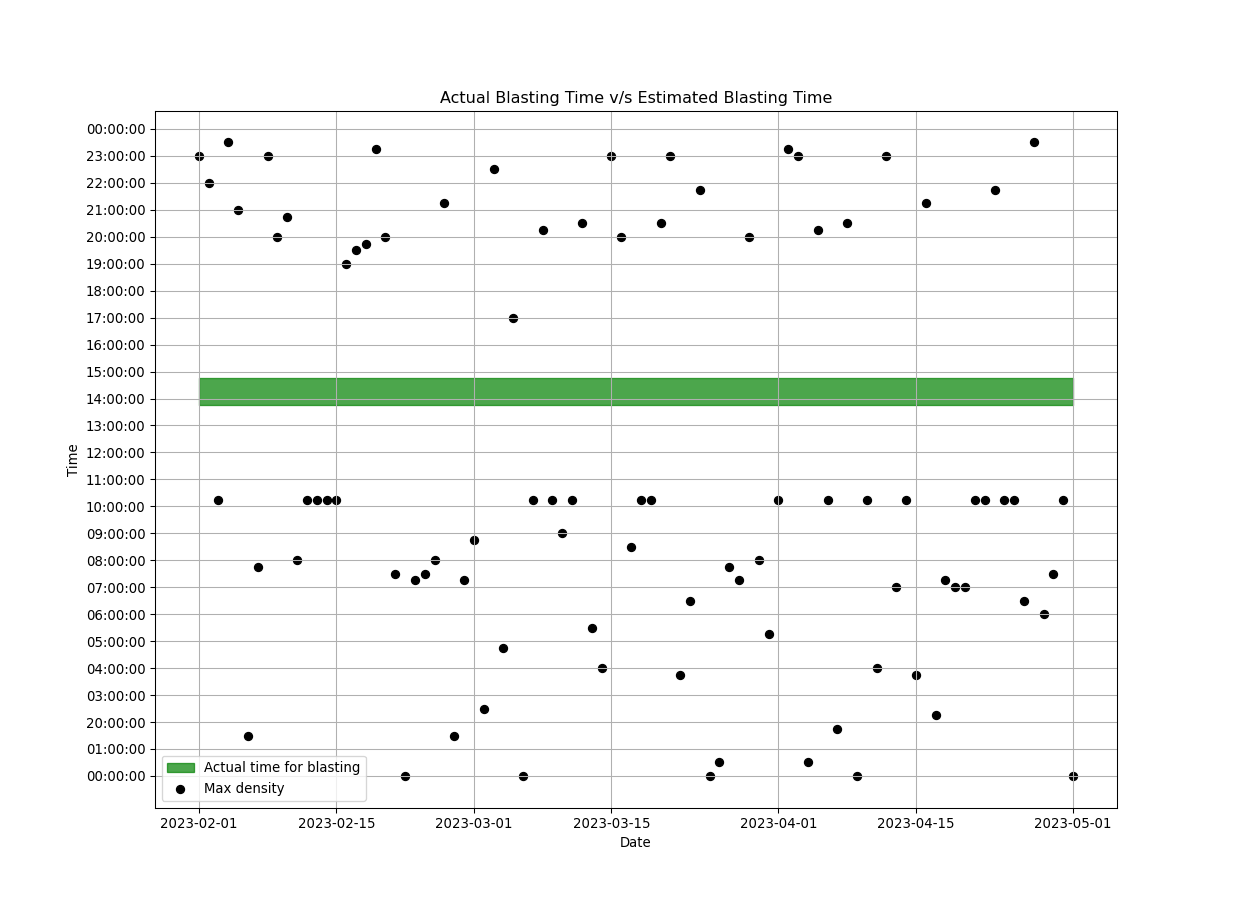

In [136]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
plt.scatter(df_max_time.index, df_max_time['total_pollution'], label = 'Max density', color = 'black')
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual Blasting Time v/s Estimated Blasting Time')
plt.show()

Above graph suggests that blasting time should be between 07:30 - 10:30 or 19:30 - 21:30
because most of the peaks per day are during that time only 

<IPython.core.display.Javascript object>


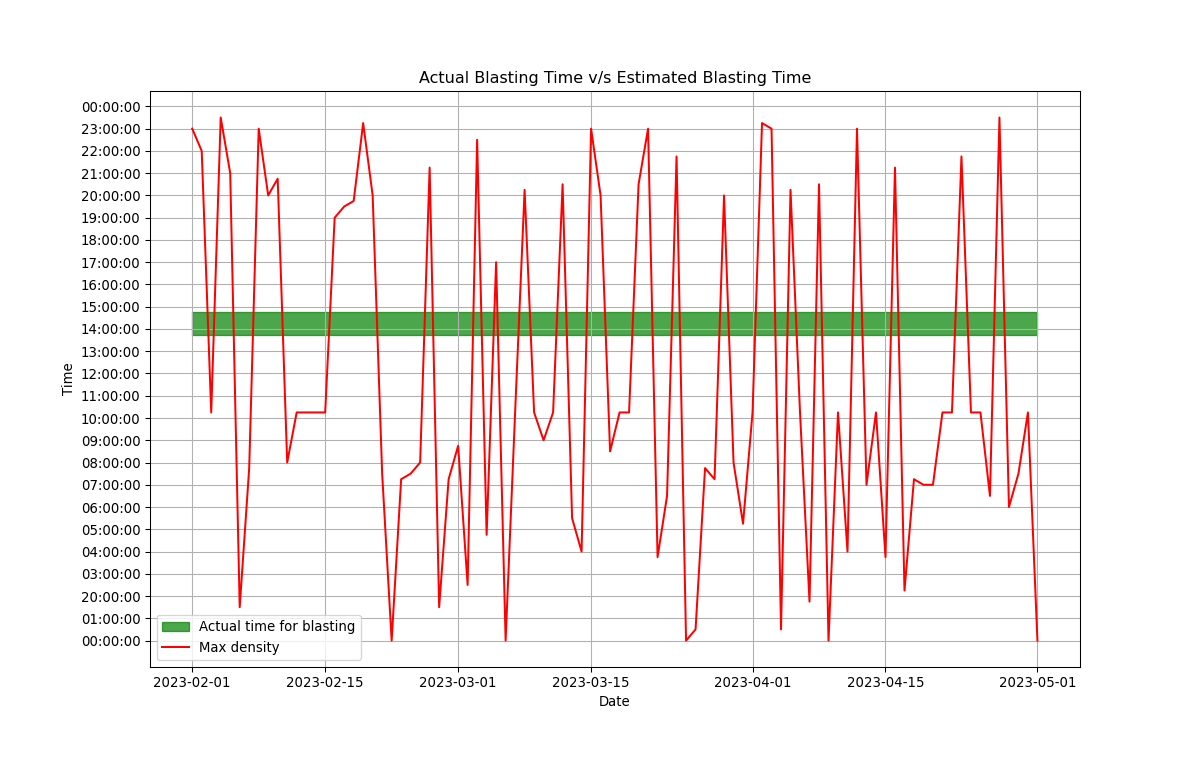

In [150]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, df_max_time['range_s'][date], df_max_time['range_e'][date], 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
plt.plot(df_max_time.index, df_max_time['total_pollution'], label = 'Max density', color = 'r')

plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual Blasting Time v/s Estimated Blasting Time')
plt.show()

In [160]:
df_max_time.index = pd.to_datetime(df_max_time.index, format = '%Y-%m-%d %H:%M:%S')
df_max_time.index

DatetimeIndex(['2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04',
               '2023-02-05', '2023-02-06', '2023-02-07', '2023-02-08',
               '2023-02-09', '2023-02-10', '2023-02-11', '2023-02-12',
               '2023-02-13', '2023-02-14', '2023-02-15', '2023-02-16',
               '2023-02-17', '2023-02-18', '2023-02-19', '2023-02-20',
               '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24',
               '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28',
               '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04',
               '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12',
               '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16',
               '2023-03-17', '2023-03-18', '2023-03-19', '2023-03-20',
               '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24',
               '2023-03-25', '2023-03-26', '2023-03-27', '2023-03-28',
      

# Probability of Blasting during 14:15 - 14:30

Through Total Pollution column we get 0 probability for blasting during 14:15 - 14:30 so we check through individual pollutants

In [163]:
t1 = pd.to_datetime('2023-02-01 14:15:00')
t2 = pd.to_datetime('2023-02-01 14:30:00')

In [164]:
t1, t2

(Timestamp('2023-02-01 14:15:00'), Timestamp('2023-02-01 14:30:00'))

<IPython.core.display.Javascript object>


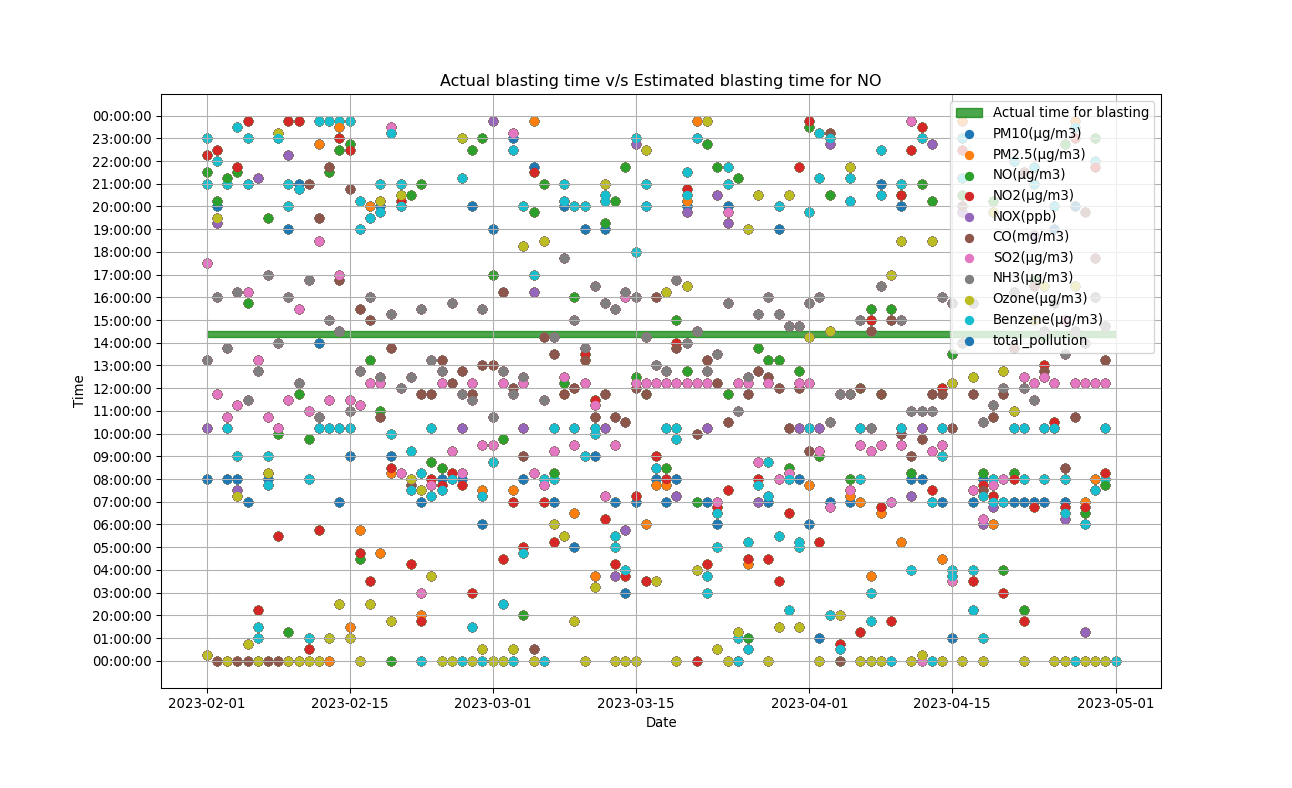

In [165]:
%matplotlib notebook
date = df_max_time.index[0]
s_t = df_max_time['range_s'][date]
e_t= df_max_time['range_e'][date],

plt.fill_between(df_max_time.index, t1, t2, 
                 label = 'Actual time for blasting', color="green", alpha=0.7);
df_max_time.drop('range_s', axis=1, inplace=True)
df_max_time.drop('range_e', axis=1, inplace=True)
for column in df_max_time.columns :
    plt.scatter(df_max_time.index, df_max_time[column], label = column)
    
for x in np.arange(1, 90):
    for column in df_max_time.columns:
        plt.scatter(df_max_time.index, df_max_time[column])
plt.yticks(datetime_array)
ytick_labels = ['00:00:00', '01:00:00', '20:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']
plt.gca().set_yticklabels(ytick_labels)
plt.grid()
plt.legend()
plt.xlabel('Date'), 
plt.ylabel('Time')
plt.title('Actual blasting time v/s Estimated blasting time for NO')
plt.show()

Also visible from above graph that not all the pollutants ever have density maximum during 14:15 - 14:30. Hence the probability is 0

# Histogram for blast time triggers

In [167]:
import matplotlib.dates as mdates

In [171]:
start_date = '2023-02-01'
end_date = '2023-05-01'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')

date_array = date_range.to_numpy()

date_array

array(['2023-02-01T00:00:00.000000000', '2023-02-02T00:00:00.000000000',
       '2023-02-03T00:00:00.000000000', '2023-02-04T00:00:00.000000000',
       '2023-02-05T00:00:00.000000000', '2023-02-06T00:00:00.000000000',
       '2023-02-07T00:00:00.000000000', '2023-02-08T00:00:00.000000000',
       '2023-02-09T00:00:00.000000000', '2023-02-10T00:00:00.000000000',
       '2023-02-11T00:00:00.000000000', '2023-02-12T00:00:00.000000000',
       '2023-02-13T00:00:00.000000000', '2023-02-14T00:00:00.000000000',
       '2023-02-15T00:00:00.000000000', '2023-02-16T00:00:00.000000000',
       '2023-02-17T00:00:00.000000000', '2023-02-18T00:00:00.000000000',
       '2023-02-19T00:00:00.000000000', '2023-02-20T00:00:00.000000000',
       '2023-02-21T00:00:00.000000000', '2023-02-22T00:00:00.000000000',
       '2023-02-23T00:00:00.000000000', '2023-02-24T00:00:00.000000000',
       '2023-02-25T00:00:00.000000000', '2023-02-26T00:00:00.000000000',
       '2023-02-27T00:00:00.000000000', '2023-02-28

<IPython.core.display.Javascript object>


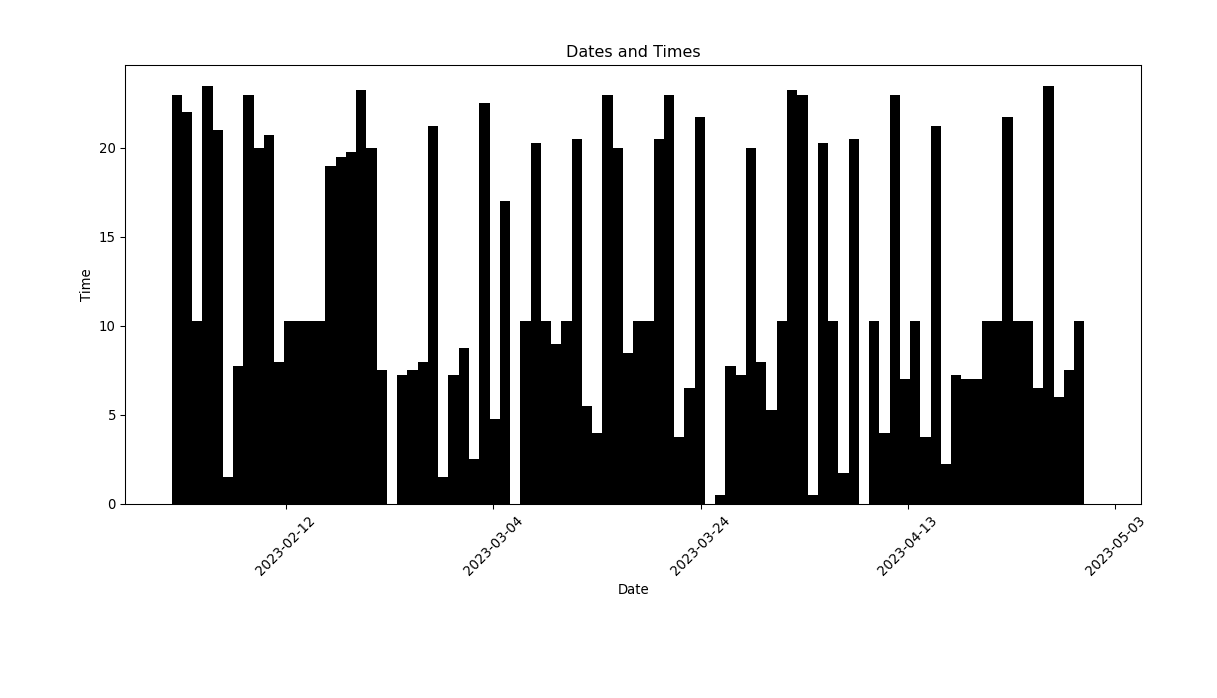

In [175]:
dates = date_array
times = df_max_time['total_pollution']
time_values = [t.hour + t.minute / 60 + t.second / 3600 for t in times]
mpl_dates = mdates.date2num(dates)
fig, ax = plt.subplots()
ax.hist(mpl_dates, bins = 90, weights = time_values, color = 'black')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Dates and Times')
plt.tight_layout()
plt.show()

In [176]:
df_max_time.head(1)

PM10(µg/m3)        PM2.5(µg/m3)           NO(µg/m3)  \
2023-02-01 2023-02-01 21:00:00 2023-02-01 08:00:00 2023-02-01 00:15:00   

                    NO2(µg/m3)            NOX(ppb)           CO(mg/m3)  \
2023-02-01 2023-02-01 21:30:00 2023-02-01 22:15:00 2023-02-01 10:15:00   

                    SO2(µg/m3)          NH3(µg/m3)        Ozone(µg/m3)  \
2023-02-01 2023-02-01 00:15:00 2023-02-01 17:30:00 2023-02-01 13:15:00   

                Benzene(µg/m3)     total_pollution  
2023-02-01 2023-02-01 00:15:00 2023-02-01 23:00:00

# Q-Q plot for blast time triggers

<IPython.core.display.Javascript object>


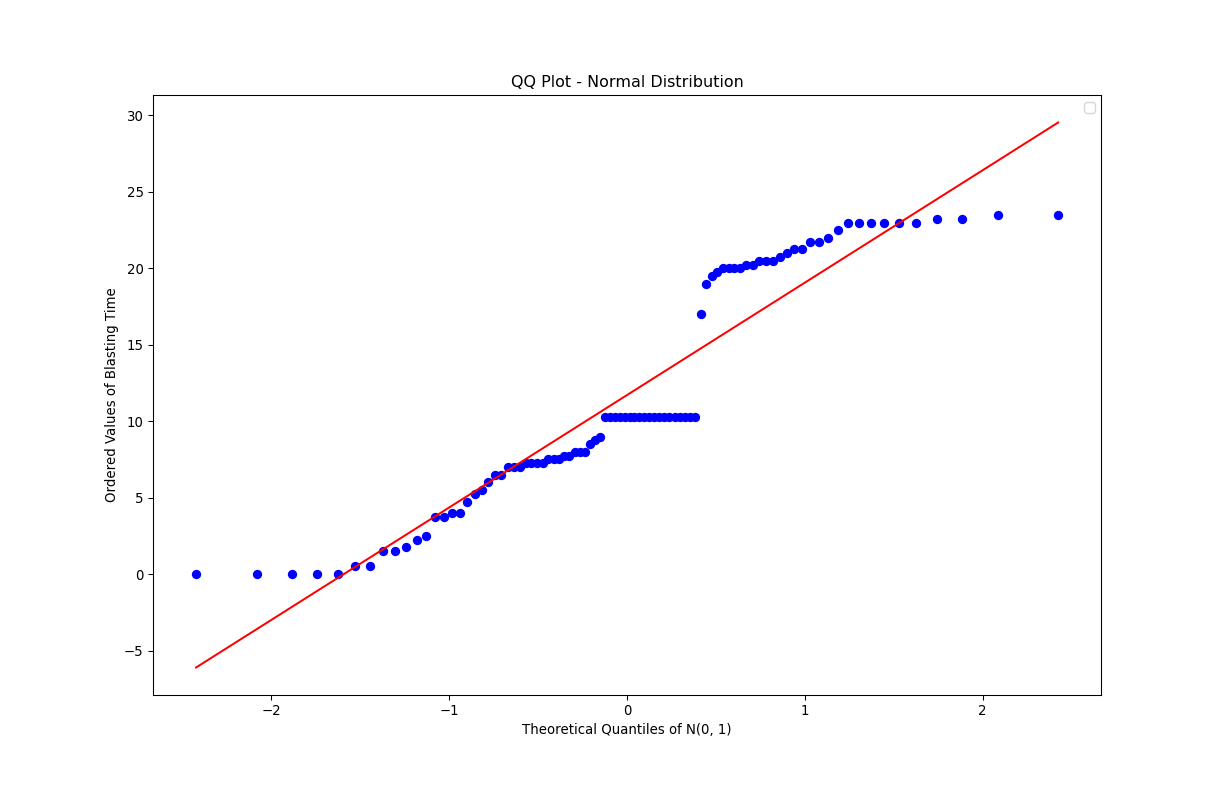

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [180]:
from scipy import stats
fig, ax = plt.subplots()
stats.probplot(time_values, dist="norm", plot=ax)
ax.set_xlabel("Theoretical Quantiles of N(0, 1)")
ax.set_ylabel("Ordered Values of Blasting Time")
ax.set_title("QQ Plot - Normal Distribution")
# plt.legend()
plt.show()

Looking carefully at above plot it is clear that the straight line fitting is not accurate so our distribution for blast time triggers does not follow normal distribution

<IPython.core.display.Javascript object>


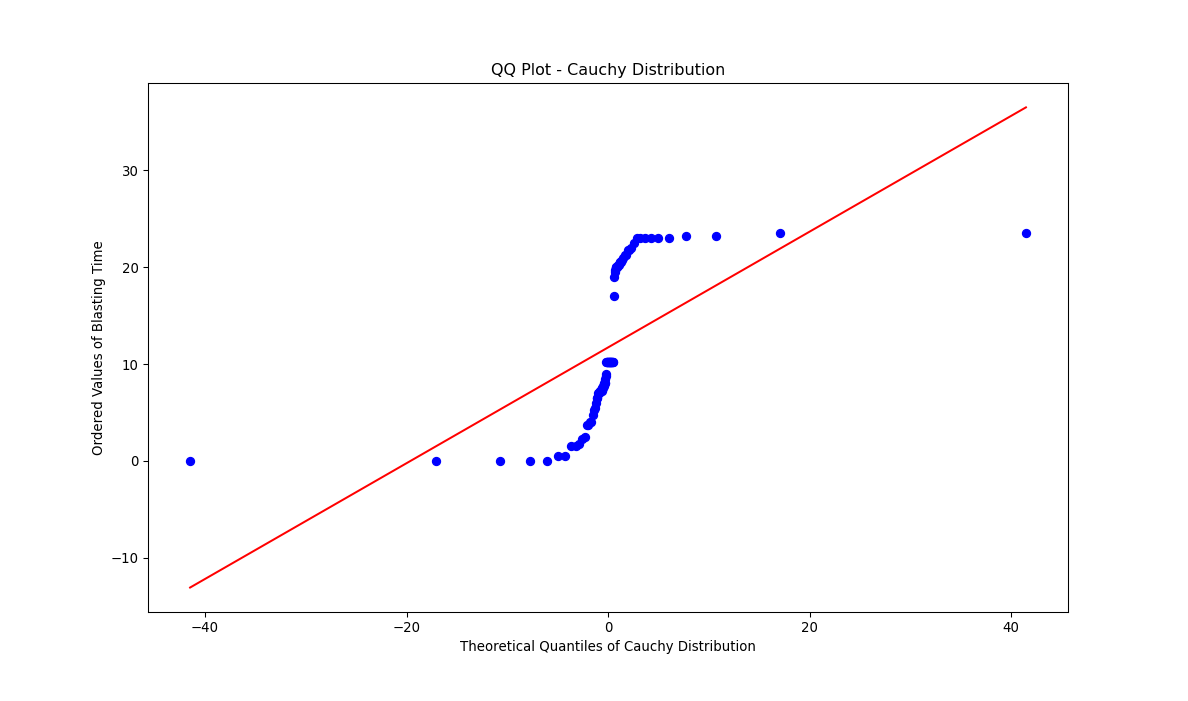

In [182]:
fig, ax = plt.subplots()
stats.probplot(time_values, dist="cauchy", plot=ax)
ax.set_xlabel("Theoretical Quantiles of Cauchy Distribution")
ax.set_ylabel("Ordered Values of Blasting Time")
ax.set_title("QQ Plot - Cauchy Distribution")
# plt.legend()
plt.show()

Blast time triggers definitely do not follow cauchy distribution

<IPython.core.display.Javascript object>


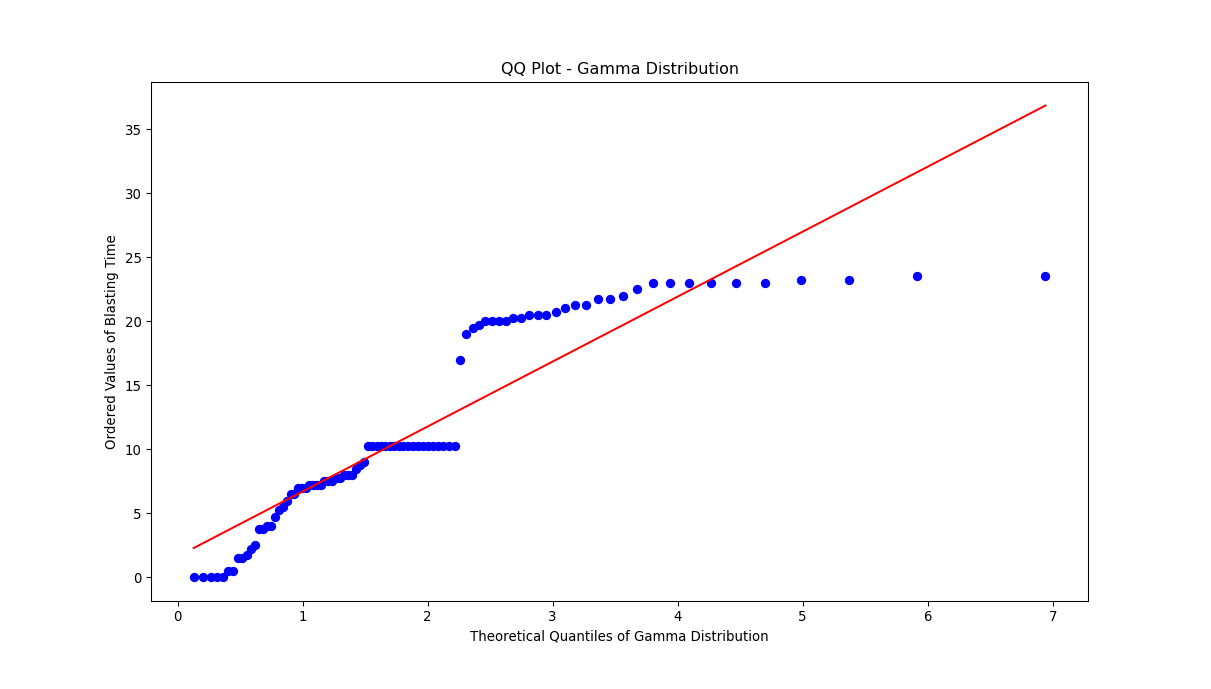

In [184]:
fig, ax = plt.subplots()
stats.probplot(time_values, dist="gamma", sparams=(2,), plot=ax)
ax.set_xlabel("Theoretical Quantiles of Gamma Distribution")
ax.set_ylabel("Ordered Values of Blasting Time")
ax.set_title("QQ Plot - Gamma Distribution")
# plt.legend()
plt.show()

Gamma distribution is also not so accurate as for one half it is little bit fit but for the other half it is nowhere close.
So by far narmal distribution is the closest to plot of blast time triggers.